<a href="https://colab.research.google.com/github/slslslrhfem/AutoGeneration/blob/master/PPDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install mido

     |████████████████████████████████| 61kB 3.6MB/s 


In [3]:
pip install pretty_midi

     |████████████████████████████████| 5.6MB 7.0MB/s 
  Created wheel for pretty-midi: filename=pretty_midi-0.2.9-cp36-none-any.whl size=5591954 sha256=db47924bea47fbad5d2514098aba616fb9ef6e43f08e2c42b3653a01c3005e8a
  Stored in directory: /root/.cache/pip/wheels/4c/a1/c6/b5697841db1112c6e5866d75a6b6bf1bef73b874782556ba66
Successfully built pretty-midi


In [4]:
pip install tensorflow==1.15.0

     |████████████████████████████████| 412.3MB 38kB/s 
     |████████████████████████████████| 51kB 7.0MB/s 
     |████████████████████████████████| 3.8MB 49.8MB/s 
     |████████████████████████████████| 512kB 41.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=2ec23dfd03ad7a652fd36d78d2efd3b706a374a0cc033943cd750f0d7bf4040e
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tens

In [5]:
pip install keras==2.3.1

     |████████████████████████████████| 378kB 8.1MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [6]:
import keras
import os
import json
import pandas
import tensorflow as tf
import numpy as np
from keras.layers import Dense
from keras import layers
from keras import optimizers
from keras.models import Sequential
import pickle
import pretty_midi
import mido
from tqdm import tqdm
import pickle
import copy

Using TensorFlow backend.


In [7]:
def get_meta(filename):
  with open('/content/drive/My Drive/MARG/PPDD-Sep2018_sym_mono_large/PPDD-Sep2018_sym_mono_large/descriptor/'+filename) as json_file:
    meta_data = json.load(json_file)
  return meta_data

In [8]:
"""
csvfilenames=os.listdir('/content/drive/My Drive/MARG/PPDD-Sep2018_sym_mono_large/PPDD-Sep2018_sym_mono_large/prime_csv')
jsonfilenames=os.listdir('/content/drive/My Drive/MARG/PPDD-Sep2018_sym_mono_large/PPDD-Sep2018_sym_mono_large/descriptor')
midifilenames=os.listdir('/content/drive/My Drive/MARG/PPDD-Sep2018_sym_mono_large/PPDD-Sep2018_sym_mono_large/prime_midi')
"""

"\ncsvfilenames=os.listdir('/content/drive/My Drive/MARG/PPDD-Sep2018_sym_mono_large/PPDD-Sep2018_sym_mono_large/prime_csv')\njsonfilenames=os.listdir('/content/drive/My Drive/MARG/PPDD-Sep2018_sym_mono_large/PPDD-Sep2018_sym_mono_large/descriptor')\nmidifilenames=os.listdir('/content/drive/My Drive/MARG/PPDD-Sep2018_sym_mono_large/PPDD-Sep2018_sym_mono_large/prime_midi')\n"

In [9]:
"""
midifilenames=sorted(midifilenames)
csvfilenames=sorted(csvfilenames)
jsonfilenames=sorted(jsonfilenames)
"""

'\nmidifilenames=sorted(midifilenames)\ncsvfilenames=sorted(csvfilenames)\njsonfilenames=sorted(jsonfilenames)\n'

In [10]:
"""
with open('/content/drive/My Drive/MARG/PPDDlist/csvnamelist.txt', 'wb') as f:
  pickle.dump(csvfilenames, f)
with open('/content/drive/My Drive/MARG/PPDDlist/jsonnamelist.txt', 'wb') as f:
  pickle.dump(jsonfilenames, f)
with open('/content/drive/My Drive/MARG/PPDDlist/midinamelist.txt', 'wb') as f:
  pickle.dump(midifilenames, f)
"""

"\nwith open('/content/drive/My Drive/MARG/PPDDlist/csvnamelist.txt', 'wb') as f:\n  pickle.dump(csvfilenames, f)\nwith open('/content/drive/My Drive/MARG/PPDDlist/jsonnamelist.txt', 'wb') as f:\n  pickle.dump(jsonfilenames, f)\nwith open('/content/drive/My Drive/MARG/PPDDlist/midinamelist.txt', 'wb') as f:\n  pickle.dump(midifilenames, f)\n"

In [11]:
"""
import pretty_midi
import mido
from tqdm import tqdm
midilist=[]
csvlist=[]
jsonlist=[]
prettymidilist=[]
for filenames in tqdm(midifilenames,position=0):
  midi_path='/content/drive/My Drive/MARG/PPDD-Sep2018_sym_mono_large/PPDD-Sep2018_sym_mono_large/prime_midi/'+filenames
  mid = mido.MidiFile(midi_path, clip=True)
  midilist.append(mid)
  prettymid=pretty_midi.PrettyMIDI(midi_path)
  prettymidilist.append(prettymid)

for filenames in tqdm(csvfilenames,position=0):
  csv_path='/content/drive/My Drive/MARG/PPDD-Sep2018_sym_mono_large/PPDD-Sep2018_sym_mono_large/prime_csv/'+filenames
  csv = pandas.read_csv(csv_path)
  csvlist.append(csv)
for filenames in tqdm(jsonfilenames,position=0):
  jsonlist.append(get_meta(filenames))

#midifilenames와 list들의 순서는 같다고 생각하고 코드 작성
"""

"\nimport pretty_midi\nimport mido\nfrom tqdm import tqdm\nmidilist=[]\ncsvlist=[]\njsonlist=[]\nprettymidilist=[]\nfor filenames in tqdm(midifilenames,position=0):\n  midi_path='/content/drive/My Drive/MARG/PPDD-Sep2018_sym_mono_large/PPDD-Sep2018_sym_mono_large/prime_midi/'+filenames\n  mid = mido.MidiFile(midi_path, clip=True)\n  midilist.append(mid)\n  prettymid=pretty_midi.PrettyMIDI(midi_path)\n  prettymidilist.append(prettymid)\n\nfor filenames in tqdm(csvfilenames,position=0):\n  csv_path='/content/drive/My Drive/MARG/PPDD-Sep2018_sym_mono_large/PPDD-Sep2018_sym_mono_large/prime_csv/'+filenames\n  csv = pandas.read_csv(csv_path)\n  csvlist.append(csv)\nfor filenames in tqdm(jsonfilenames,position=0):\n  jsonlist.append(get_meta(filenames))\n\n#midifilenames와 list들의 순서는 같다고 생각하고 코드 작성\n"

In [12]:
"""
import pickle
with open('/content/drive/My Drive/MARG/PPDDlist/midilist.txt', 'wb') as f:
  pickle.dump(midilist, f)
with open('/content/drive/My Drive/MARG/PPDDlist/csvlist.txt', 'wb') as f:
  pickle.dump(csvlist, f)
with open('/content/drive/My Drive/MARG/PPDDlist/jsonlist.txt', 'wb') as f:
  pickle.dump(jsonlist, f)
with open('/content/drive/My Drive/MARG/PPDDlist/prettymidilist.txt', 'wb') as f:
  pickle.dump(prettymidilist, f)
"""

"\nimport pickle\nwith open('/content/drive/My Drive/MARG/PPDDlist/midilist.txt', 'wb') as f:\n  pickle.dump(midilist, f)\nwith open('/content/drive/My Drive/MARG/PPDDlist/csvlist.txt', 'wb') as f:\n  pickle.dump(csvlist, f)\nwith open('/content/drive/My Drive/MARG/PPDDlist/jsonlist.txt', 'wb') as f:\n  pickle.dump(jsonlist, f)\nwith open('/content/drive/My Drive/MARG/PPDDlist/prettymidilist.txt', 'wb') as f:\n  pickle.dump(prettymidilist, f)\n"

In [13]:

with open('/content/drive/My Drive/MARG/PPDDlist/midilist.txt', 'rb') as f:
  midilist=pickle.load(f)
with open('/content/drive/My Drive/MARG/PPDDlist/csvlist.txt', 'rb') as f2:
  csvlist=pickle.load(f2)
with open('/content/drive/My Drive/MARG/PPDDlist/jsonlist.txt', 'rb') as f3:
  jsonlist=pickle.load(f3)
with open('/content/drive/My Drive/MARG/PPDDlist/prettymidilist.txt', 'rb') as f4:
  prettymidilist=pickle.load(f4)

Following code block is using data set with CSV file, but It doesn't works for Large Data set because it has '1.5.1' value. (I don't know why this CSV has this value..)

In [14]:
#CSV Dataset has problem for large data set.
"""
bar_list=[]
one_bar_number_list=[]
starting_number_list=[]
for i,csvs in enumerate(tqdm(csvlist)):
  a=np.array([list(map(float,csvs.columns))])#column에도 숫자가 들어가 있어서.. 경우에 따라 조절한다
  b=np.array(csvs.values)
  csvarray=np.concatenate((a,b),axis=0)
  if('timeSignature' not in jsonlist[i]):
    jsonlist[i]['timeSignature']=[4,4]
  one_bar_number=jsonlist[i]['timeSignature'][0]
  bar_number=(csvarray[-1][0]-csvarray[0][0])//one_bar_number+1
  bar_info_list=[]
  for i in range(int(bar_number)):
    starting_bar_time=csvarray[0][0]+i*one_bar_number
    bar_info_list.append(csvarray[np.where( (starting_bar_time<=csvarray[:,0]) & (csvarray[:,0]<starting_bar_time+one_bar_number) )])
  bar_list.append(bar_info_list)
  one_bar_number_list.append(one_bar_number)
  starting_number_list.append(csvarray[0][0])
"""

"\nbar_list=[]\none_bar_number_list=[]\nstarting_number_list=[]\nfor i,csvs in enumerate(tqdm(csvlist)):\n  a=np.array([list(map(float,csvs.columns))])#column에도 숫자가 들어가 있어서.. 경우에 따라 조절한다\n  b=np.array(csvs.values)\n  csvarray=np.concatenate((a,b),axis=0)\n  if('timeSignature' not in jsonlist[i]):\n    jsonlist[i]['timeSignature']=[4,4]\n  one_bar_number=jsonlist[i]['timeSignature'][0]\n  bar_number=(csvarray[-1][0]-csvarray[0][0])//one_bar_number+1\n  bar_info_list=[]\n  for i in range(int(bar_number)):\n    starting_bar_time=csvarray[0][0]+i*one_bar_number\n    bar_info_list.append(csvarray[np.where( (starting_bar_time<=csvarray[:,0]) & (csvarray[:,0]<starting_bar_time+one_bar_number) )])\n  bar_list.append(bar_info_list)\n  one_bar_number_list.append(one_bar_number)\n  starting_number_list.append(csvarray[0][0])\n"

In [15]:
#이게 이제 input을 midi로 받는 코드.
bar_list=[]
one_bar_number_list=[]
starting_number_list=[]
for i,songs in enumerate(prettymidilist):#곡마다.
  if('timeSignature' not in jsonlist[i]):
    jsonlist[i]['timeSignature']=[4,4]
  if(jsonlist[i]['timeSignature']!=[4,4]):#여기부터 3줄의 코드를 삭제하면 3박자 등의 data도 고려한다.
    pass
  else:
    for instrument in songs.instruments: #2. 어차피 instrument하나
      csvarray=[]
      for note in instrument.notes: #3
        row=[note.start*2, note.pitch, note.pitch, (note.end - note.start)*2, 0] #*2를 해줘야 제대로 하나의 bar가 하나의 단위가 된다.
        csvarray.append(row)
    csvarray=np.array(csvarray)
    one_bar_number=jsonlist[i]['timeSignature'][0]
    bar_number=(csvarray[-1][0]-csvarray[0][0])//one_bar_number+1
    bar_info_list=[]
    for i in range(int(bar_number)):
      starting_bar_time=csvarray[0][0]+i*one_bar_number
      bar_info_list.append(csvarray[np.where( (starting_bar_time<=csvarray[:,0]) & (csvarray[:,0]<starting_bar_time+one_bar_number) )])
    bar_list.append(bar_info_list)# bar info list가 bar마다 csv내용들 담겨져 있는거다.
    one_bar_number_list.append(one_bar_number)
    starting_number_list.append(csvarray[0][0])

In [16]:
print(bar_list[0][0])#1번째 곡의 1번째 bar.
print(jsonlist[0])

[[ 0.         42.         42.          1.16666667  0.        ]
 [ 1.5        42.         42.          0.33333333  0.        ]
 [ 2.         42.         42.          1.16666667  0.        ]
 [ 3.5        42.         42.          0.33333333  0.        ]]
{'id': '0000ee22-8e62-47c3-aca3-49b7999f8cf7', 'idLakh': '86545d15b5b9dda20268c47d827f072d', 'bpm': 145, 'timeSignature': [5, 4], 'keyEstimate': 'C major'}


In [36]:
Minimum_time = 16 #This value means we use (Minimum_time)th note for minimum unit. I use 24th note for minimum unit

def nearest_time(time,minimum_size):
  #혹시나 값이 조금 벗어나는 엇박 음을 가까운 최소단위로 Shifting한다.
  #다만 엇박 관련 Skill Detecting을 따로 고려할시 코드를 수정할 수 있다.
  num_to_multiply=time/minimum_size
  num_to_multiply=int(num_to_multiply)
  left_time=num_to_multiply*minimum_size
  right_time=left_time+minimum_size
  if (time-left_time>=right_time-time):
    return right_time
  return left_time

def bar_to_matrix3(bar,one_bar_number,starting_number,i,minimum_time):
  #Duration에 따라 Ploting한다.
  #size를 상당히 작게 잡는다.
  #8/6박이면 one_bar_number가 8이다. 그러면 바 1개당 무조건 12개 처리하는거로 한다.

  init=np.zeros((24,minimum_time))#112는 Note의 수(감으로 써둠.. 나중에 전체 데이터로 할때 수정 가능성 있음 그런데 Shift를 잘 이용하면 96*96도 가능해보임.)
  minimum_size=one_bar_number/minimum_time
  zero_time=starting_number+one_bar_number*i
  min_height=500
  for lists in bar:
    if min_height>lists[1]:
      min_height=lists[1]    
  for j,lists in enumerate(bar):
    #lists[0]은 시간, lists[1]은 Note 높이, lists[3]은 Duration. 
    point=int((nearest_time(lists[0],minimum_size)-zero_time)/minimum_size)
    length=int(round(lists[3]/minimum_size))
    if (length>3):
      length=length-1#여러번 두두두 치는 음을 구별하기 위함
    if (point+length>minimum_time-1):
      length=minimum_time-1-point # 한 음이 2Bar에 걸쳐있는 경우 Bar 뒤쪽의 음을 무시한다.
    height=lists[1]-min_height
    """
    while(height>23):
      height=height-12 
    """
    if (height<24):#two choices for handling notes that has pitch difference above 23, delete or shifting.  
      init[23-int(height)][point:point+length]+=1
  return init

In [37]:
#bar_list to bar_matrix_list
#bar_matrix_list=copy.deepcopy(bar_list)
#bar_matrix_list2=copy.deepcopy(bar_list)
bar_matrix_list3=copy.deepcopy(bar_list)
for i,songs in enumerate(bar_matrix_list3):
  for j,bar in enumerate(songs):
    #print(one_bar_number_list[i],starting_number_list[i])
    #matrix=bar_to_matrix1(bar,one_bar_number_list[i],starting_number_list[i],j)
    #matrix2=bar_to_matrix2(bar,one_bar_number_list[i],starting_number_list[i],j)
    matrix3=bar_to_matrix3(bar,one_bar_number_list[i],starting_number_list[i],j,Minimum_time)
    #bar_matrix_list[i][j]=matrix
    #bar_matrix_list2[i][j]=matrix2
    bar_matrix_list3[i][j]=matrix3

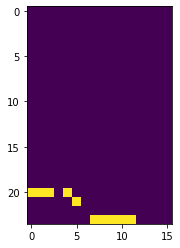

In [38]:
import matplotlib.pyplot as plt

plt.imshow(bar_matrix_list3[2][3])

In [39]:
bar_updown_list=copy.deepcopy(bar_list)
for i,songs in enumerate(bar_list):
  for j,bar in enumerate(songs):
    if (j==len(songs)-1):
      updown_label='final'
    elif(len(bar_list[i][j])==0 or len(bar_list[i][j+1])==0):
      updown_label='meanless'
    else:
      if(bar_list[i][j][len(bar_list[i][j])-1][1]<=bar_list[i][j+1][0][1]):
        updown_label='up'
      else:
        updown_label='down'
    bar_updown_list[i][j]=updown_label

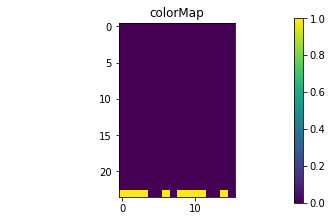

In [40]:
H = bar_matrix_list3[0][0]

fig = plt.figure(figsize=(6, 3.2))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(H)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

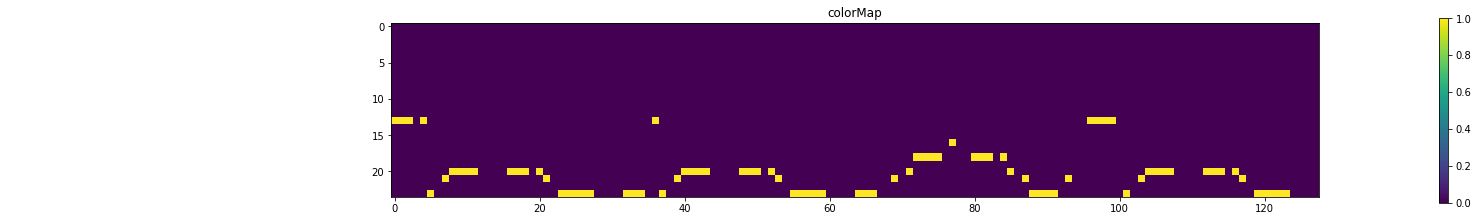

In [41]:
tot=bar_matrix_list3[2]
H=bar_matrix_list3[2][0]
for i in range(1,len(tot)):
  a=bar_matrix_list3[2][i]
  H=np.concatenate((H,a),axis=1)
  
fig = plt.figure(figsize=(30, 3.2))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(H)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()
#위 for문 없이 돌리면 1 bar만 나옴

In [42]:
def bar_to_contour(bar,one_bar_number,starting_number,j):
  contour=[]
  pitch_change_list=[]
  duration_list=[]
  real_pitch_list=[]
  real_time_list=[]
  real_duration_list=[]
  now_pitch=1000
  first_time=starting_number+one_bar_number*j
  a=0
  for lists in bar:
    if(a!=0): 
      real_time_list.append(lists[0]-now_rhythm)
    now_rhythm=lists[0]
    a+=1
    if (first_time*1.001<lists[0]):#smoothing for case like first time=5.00001, lists[0]=5.0000..
      resting_time=lists[0]-first_time
      duration_list.append(resting_time)
      first_time=lists[0]
      pitch_change_list.append('Rest')
    if (now_pitch==1000):
      pitch_change_list.append('Starting_Point')
      real_pitch_list.append('Starting_Point')
      real_duration_list.append(lists[3])
      duration_list.append(lists[3])
      first_time=first_time+lists[3]
      now_pitch=lists[1]
      a+=1
    else:
      pitch_change=lists[1]-now_pitch
      pitch_change_list.append(str(pitch_change))#나중에 int로 바꿔쓸 것. 자료형 터지는거 때문에 우선 스트링.
      duration_list.append(lists[3])
      real_duration_list.append(lists[3])
      first_time=first_time+lists[3]
      now_pitch=lists[1]
      real_pitch_list.append(str(pitch_change))
  if (first_time*1.001<starting_number+one_bar_number*(j+1)):
    pitch_change_list.append('Rest')#마지막 Rest
    duration_list.append(starting_number+one_bar_number*(j+1)-first_time)
  if(len(bar)!=0):
    real_time_list.append(starting_number+one_bar_number*(j+1)-now_rhythm)
  contour.append(pitch_change_list)
  contour.append(duration_list)
  contour.append(real_pitch_list)
  contour.append(real_time_list)
  contour.append(real_duration_list)
  #something
  return contour



Plot에서 중요한것은 Y-Axis의 0~112의 숫자가 Note의 반대 성향을 가진다는 것이다.(숫자가 커질수록 Note의 높이가 낮아진다.) 이는 PianoRoll을 이미지 처럼 사용하는 과정에서, 직관적인 학습이 가능하도록 이와 같이 구현한 것이다.

In [43]:
bar_contour_list=copy.deepcopy(bar_list)
for i,songs in enumerate(bar_list):
  for j,bar in enumerate(songs):
    contour=bar_to_contour(bar,one_bar_number_list[i],starting_number_list[i],j)
    bar_contour_list[i][j]=contour


bar_contour_list : 중간과정
bar_matrix_list2 : 아마 학습에 사용하게 될 Matrix의 List
bar_label_list : 학습에 사용하게 될 Label의 List

In [44]:
print(bar_contour_list[0][0])


[['Starting_Point', 'Rest', '0.0', 'Rest', '0.0', 'Rest', '0.0', 'Rest'], [1.1666666666666665, 0.3333333333333335, 0.33333333333333326, 0.16666666666666674, 1.1666666666666665, 0.3333333333333335, 0.33333333333333304, 0.16666666666666696], ['Starting_Point', '0.0', '0.0', '0.0'], [1.5, 0.5, 1.5, 0.5], [1.1666666666666665, 0.33333333333333326, 1.1666666666666665, 0.33333333333333304]]


In [45]:
for contours in bar_contour_list[11]:
  print(contours)

[['Starting_Point', 'Rest', '0.0', '-2.0', '-1.0', '1.0', '2.0'], [0.33333333333333326, 0.16666666666666674, 0.5, 0.25, 0.75, 0.5, 1.75], ['Starting_Point', '0.0', '-2.0', '-1.0', '1.0', '2.0'], [0.5, 0.5, 0.25, 0.75, 0.5, 1.5], [0.33333333333333326, 0.5, 0.25, 0.75, 0.5, 1.75]]
[['Rest', 'Starting_Point', '-2.0', '-1.0', '-2.0', '0.0', 'Rest', '2.0'], [0.5, 0.5, 0.25, 0.75, 0.5, 0.16666666666666607, 0.8333333333333339, 0.5], ['Starting_Point', '-2.0', '-1.0', '-2.0', '0.0', '2.0'], [0.5, 0.25, 0.75, 0.5, 1.0, 0.5], [0.5, 0.25, 0.75, 0.5, 0.16666666666666607, 0.5]]
[['Starting_Point', '-3.0', 'Rest', '0.0'], [2.0, 0.33333333333333215, 0.16666666666666785, 1.5], ['Starting_Point', '-3.0', '0.0'], [2.0, 0.5, 1.5], [2.0, 0.33333333333333215, 1.5]]
[['Starting_Point', 'Rest'], [1.5, 2.5], ['Starting_Point'], [4.0], [1.5]]
[['Starting_Point', 'Rest', '0.0', '-2.0', '-1.0', '1.0', '2.0', 'Rest'], [0.33333333333333215, 0.16666666666666785, 0.5, 0.25, 0.75, 0.25, 0.1666666666666643, 1.58333333

In [46]:
#최대한 많고 깔끔한 조건문을 사용하여 Skill들을 정의해볼 것. Multilabel Classification의 가능성이 있다.
"""
Skill들의 음악학적인 특성 & 계산적인 특성을 적는 곳
'resting' : 포함하는 음이 0 또는 1개인 경우 resting으로 정의. 다른 Skill들은 겹칠 수 있으나 이 skill이 Label될 경우 그냥 resting 고정이다.
즉, Skilling Labeling은 'resting'이 아닌 경우에 진행된다.(삭제)
'repeating' : 전체 음 중 n% 이상 또는 n개를 제외한 경우가 전부 같은 음일 경우 repeating으로 정의
'up_steping' : 전체 음 중 n% 이상 또는 n개를 제외한 경우가 steping up 또는 같은 음, 즉 반음기준 3Note 이하로 상승하는 형태일 경우 up_steping으로 정의
'down_steping' : 전체 음 중 n% 이상 또는 n개를 제외한 경우가 steping down 또는 같은 음, 즉 반음기준 3Note 이하로 하강하는 형태일 경우 down_steping으로 정의
'up_leaping' : 전체 음 중 n% 이상 또는 n개를 제외한 경우가 leaping up, 즉 반음기준 3Note 이상으로 상승하는 형태일 경우 up_leaping으로 정의
'down_leaping' : 전체 음 중 n% 이상 또는 n개를 제외한 경우가 leaping down, 즉 반음기준 3Note 이상으로 하강하는 형태일 경우 down_leaping으로 정의
3Note에서 겹치는게 맞다. Multilabel Classification을 고안 중이기 때문.
'steping_twisting' : 음이 4개 이상이고, n개를 제외한 경우가 2Note 이하의 상승과 하강을 반복하는 형태일 경우 steping_twisting으로 정의
'leaping_twisting' : 음이 4개 이상이고, n개를 제외한 경우가 3Note 이상의 상승과 하강을 반복하는 형태일 경우 leaping_twisting으로 정의
'fast_rhythm' : 1 bar 내에 음이 9개 이상인 경우 fast_rhythm으로 정의.
'One_rhythm' :  모든 음이 지닌 연주의 real_time, 즉 음이 울리고 다음 음이 나올때 까지의 시간이 같으면 One_rhythm으로 정의
'triplet' : real_time기반해서 triplet이 존재하면(Note 3개) triplet으로 정의
'Staccato' : real_Duration_Time 기반해서 n% 이상의 음의 Duration이 0.16667(최소단위*4임)보다 작으면(매우 짧으면) Staccato로 정의
'continuing_rhythm' : pitch_change_list에서 'Rest'의 비율이 25퍼센트 이하면 continuing_rhythm으로 정의
첫 음 제외 실 음의 75%를 기준으로 잡는다.
5개 이상의 음이 있다면 1개를 제외하고 전부 조건에 맞아야하고,
9개 이상의 음이 있다면 2개를 제외하고 전부 조건에 맞아야하고...
4개 이하는 다 맞아야 한다.
ex) CDEF -> up_steping, CDED -> None, CDEFD-> up_steping.
다만 Leaping에 대해서는 많이 후해질 것 같다. 거의 50%가까이..?  
"""

"""
예시로는..
contour[0] = ['Starting_Point', 'Rest', '4.0', '1.0', 'Rest', '2.0', 'Rest', '-7.0', 'Rest'] Note pitch의 변화를 쉼표를 포함하여 의미한다.
contour[1] = [0.83333, 0.16666999999999987, 0.5, 0.33333, 0.16666999999999987, 0.8333299999999999, 0.16666999999999987, 0.75, 0.25] Duration을 쉼표를 포함하여 의미한다.
contour[2] = ['Starting_Point', '4.0', '1.0', '2.0', '-7.0'] note pitch의 변화를 의미한다.
contour[3] = [1.0, 0.5, 0.5, 1.0, 1.0] 한 음의 실 연주시간을 의미한다.(다음 음이 나올때 까지의 시간)
contour[4] = [0.83333, 0.5, 0.33333, 0.8333299999999999, 0.75] Duration을 의미한다.
"""
def is_repeating(contour_list,exception_range):
  boolean_repeating=0
  non_repeat=0
  for elements in contour_list:
    if (elements is not 'Starting_Point'):
      if(elements != '0.0'):
        non_repeat+=1
  if (non_repeat<=exception_range):
    boolean_repeating=1
  return boolean_repeating

def is_up_steping(contour_list,exception_range):
  balancing_param=1
  boolean_up_steping=0
  non_step_up=0
  now_step_up=0
  for elements in contour_list:
    if (elements is not 'Starting_Point'):
      if (now_step_up==0):
        if (float(elements)<0.5 or float(elements)>4.5):
          now_step_up=0
          non_step_up+=1
        else:
          now_step_up=1
      else:
        if(float(elements)<-0.5 or float(elements)>4.5):
          now_step_up=0
          non_step_up+=1
        else:
          now_step_up=1
  if(non_step_up<=exception_range+balancing_param):
    boolean_up_steping=1
  return boolean_up_steping

def is_down_steping(contour_list,exception_range):
  boolean_down_steping=0
  balancing_param=0
  non_step_down=0
  now_step_down=0
  for elements in contour_list:
    if (elements is not 'Starting_Point'):
      if (now_step_down==0):
        if (float(elements)>-0.5 or float(elements)<-4.5):
          now_step_down=0
          non_step_down+=1
        else:
          now_step_down=1
      else:
        if(float(elements)>0.5 or float(elements)<-4.5):
          now_step_down=0
          non_step_down+=1
        else:
          now_step_down=1
  if(non_step_down<=exception_range+balancing_param):
    boolean_down_steping=1
  return boolean_down_steping

def is_up_leaping(contour_list,exception_range):
  boolean_up_leaping=0
  non_leap_up=0
  for elements in contour_list:
    if (elements is not 'Starting_Point'):
      if (float(elements)<3.5):
        non_leap_up+=1
  if (non_leap_up<=exception_range+1):
    boolean_up_leaping=1
  return boolean_up_leaping

def is_down_leaping(contour_list,exception_range):
  boolean_down_leaping=0
  non_leap_down=0
  for elements in contour_list:
    if (elements is not 'Starting_Point'):
      if (float(elements)>-3.5):
        non_leap_down+=1
  if (non_leap_down<=exception_range+1):
    boolean_down_leaping=1
  return boolean_down_leaping

def is_leaping_twisting(contour_list,exception_range):
  boolean_leaping_twisting=0
  non_leap_twist=0
  balancing_param=1
  now_dir=0 #1for up, -1 for down
  for elements in contour_list:
    if (elements is not 'Starting_Point'):
      if (now_dir==0):
        if (3.5<float(elements)):
          now_dir=1
        elif (float(elements) <-3.5):
          now_dir=-1
        else:
          non_leap_twist+=1
      elif (now_dir==1):
        if (float(elements) <-3.5):
          now_dir=-1
        else:
          now_dir=0
          non_leap_twist+=1
      elif (now_dir==-1):
        if (3.5<float(elements)):
          now_dir=1
        else:
          now_dir=0
          non_leap_twist+=1
  if(non_leap_twist<=exception_range+balancing_param):
    boolean_leaping_twisting=1
  return boolean_leaping_twisting

def is_steping_twisting(contour_list,exception_range):
  boolean_steping_twisting=0
  non_step_twist=0
  now_dir=0 #1for up, -1 for down
  for elements in contour_list:
    if (elements is not 'Starting_Point'):
      if (now_dir==0):
        if (0<float(elements) and float(elements) <2.5):
          now_dir=1
        elif (-2.5<float(elements) and float(elements) <0):
          now_dir=-1
        else:
          non_step_twist+=1
      elif (now_dir==1):
        if (-2.5<float(elements) and float(elements) <0):
          now_dir=-1
        else:
          now_dir=0
          non_step_twist+=1
      elif (now_dir==-1):
        if (0<float(elements) and float(elements) <2.5):
          now_dir=1
        else:
          now_dir=0
          non_step_twist+=1
  if(non_step_twist<=exception_range):
    boolean_steping_twisting=1
  return boolean_steping_twisting

def is_one_rhythm(contour_list,exception_range):
  boolean_one_rhythm=0
  non_same_rhythm=0

  first_rhythm=contour_list[0]
  for rhythms in contour_list:
    if (rhythms != first_rhythm):
      non_same_rhythm=1
  boolean_one_rhythm=1-non_same_rhythm
  return boolean_one_rhythm

def is_triplet(contour_list,exception_range):
  boolean_triplet=0
  now_triplet=0
  for rhythms in contour_list:
    rhythms=float(rhythms)
    if (rhythms%0.015625>0.001):
      if(now_triplet==1):
        boolean_triplet=1
      now_triplet+=1
    else:
      now_triplet=0
      
  return boolean_triplet

def is_staccato(contour_list,exception_range):
  boolean_staccato=0
  ranges=len(contour_list)//2
  staccato_num=0
  for times in contour_list:
    if (times<0.2):
      staccato_num+=1
  if (staccato_num>=ranges):
    boolean_staccato=1
  return boolean_staccato

def is_continuing_rhythm(contour_list):
  boolean_continuing_rhythm=0
  length=len(contour_list)
  rest_num=0
  for elements in contour_list:
    if (elements=='Rest'):
      rest_num+=1
  if (rest_num<=0.5):
    boolean_continuing_rhythm=1
  return boolean_continuing_rhythm

def contour_to_label(contour):
  labels=[]
  totnum=len(contour[2]) #실 음의 갯수이다.
  exception_range=(totnum-1)//4
  exception_range2=(totnum-1)//3
  if (len(contour[2])<2.5):
    pass#원래는 resting이라는 Label을 append했으나 Control이 까다롭다
  else:
    if (is_repeating(contour[2],exception_range2)):
      labels.append('repeating')

    if (is_up_steping(contour[2],exception_range)):
      if (len(contour[2])>3):
        labels.append('up_steping')

    if (is_down_steping(contour[2],exception_range)):
      if (len(contour[2])>3):
        labels.append('down_steping')

    if (is_up_leaping(contour[2],exception_range2)):
      labels.append('up_leaping')
    
    if (is_down_leaping(contour[2],exception_range2)):
      labels.append('down_leaping')

    if (is_steping_twisting(contour[2],exception_range2)):
      if (len(contour[2])>3):
        labels.append('steping_twisting')

    if (is_leaping_twisting(contour[2],exception_range2)):
      if (len(contour[2])>3):
        labels.append('leaping_twisting')

    if (len(contour[2])>8.5):
      labels.append('fast_rhythm')

    if (is_one_rhythm(contour[3],exception_range)):
      labels.append('One_rhythm')

    if (is_triplet(contour[3],exception_range2)):
      labels.append('triplet')

    if (is_staccato(contour[4],exception_range2)):
      labels.append('staccato')  

    if (is_continuing_rhythm(contour[0])):
      labels.append('continuing_rhythm')  

  if (len(labels)==0):
    labels.append('no skills')#classifier과 cGan에서 사용은 하되, 추후 음원 제작에서 사용을 안한다.


  return labels

In [47]:
bar_label_list=copy.deepcopy(bar_contour_list)
for i,songs in enumerate(bar_contour_list):
  for j,contour in enumerate(songs):
    label=contour_to_label(contour) 
    bar_label_list[i][j]=label

In [48]:
for j in range(len(bar_label_list[0])):
  print(bar_label_list[0][j])
  print(bar_contour_list[0][j])

['repeating']
[['Starting_Point', 'Rest', '0.0', 'Rest', '0.0', 'Rest', '0.0', 'Rest'], [1.1666666666666665, 0.3333333333333335, 0.33333333333333326, 0.16666666666666674, 1.1666666666666665, 0.3333333333333335, 0.33333333333333304, 0.16666666666666696], ['Starting_Point', '0.0', '0.0', '0.0'], [1.5, 0.5, 1.5, 0.5], [1.1666666666666665, 0.33333333333333326, 1.1666666666666665, 0.33333333333333304]]
['repeating']
[['Starting_Point', 'Rest', '0.0', 'Rest', '0.0', 'Rest', '0.0', 'Rest'], [1.166666666666666, 0.3333333333333339, 0.33333333333333304, 0.16666666666666696, 1.166666666666666, 0.3333333333333339, 0.33333333333333304, 0.16666666666666696], ['Starting_Point', '0.0', '0.0', '0.0'], [1.5, 0.5, 1.5, 0.5], [1.166666666666666, 0.33333333333333304, 1.166666666666666, 0.33333333333333304]]
['repeating']
[['Starting_Point', 'Rest', '0.0', 'Rest', '0.0', 'Rest', '0.0', 'Rest'], [1.166666666666666, 0.3333333333333339, 0.33333333333333215, 0.16666666666666785, 1.166666666666666, 0.33333333333

[['Starting_Point', 'Rest', '0.0', 'Rest', '0.0', 'Rest', '0.0', 'Rest'], [1.1666666666666665, 0.3333333333333335, 0.33333333333333326, 0.16666666666666674, 1.1666666666666665, 0.3333333333333335, 0.33333333333333304, 0.16666666666666696], ['Starting_Point', '0.0', '0.0', '0.0'], [1.5, 0.5, 1.5, 0.5], [1.1666666666666665, 0.33333333333333326, 1.1666666666666665, 0.33333333333333304]]
['repeating']
[[ 0.         42.         42.          1.16666667  0.        ]
 [ 1.5        42.         42.          0.33333333  0.        ]
 [ 2.         42.         42.          1.16666667  0.        ]
 [ 3.5        42.         42.          0.33333333  0.        ]]


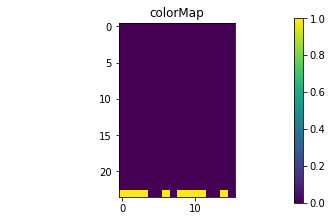

In [49]:
#Summary
print(bar_contour_list[0][0])
print(bar_label_list[0][0])
print(bar_list[0][0])

H=bar_matrix_list3[0][0]
fig = plt.figure(figsize=(6, 3.2))
ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(H)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

In [50]:
all_matrix=[]
all_labels=[]
all_updown_labels=[]
for songs in bar_label_list:
  for label in songs:
    label=np.array(label)
    all_labels.append(label)
for songs in bar_matrix_list3:
  for matrix in songs:
    matrix=matrix.reshape(24,Minimum_time,1)
    all_matrix.append(matrix)
for songs in bar_updown_list:
  for label in songs:
    all_updown_labels.append(label)


In [51]:
print(len(all_matrix),len(all_labels),len(all_updown_labels))

137207 137207 137207


In [52]:
import keras.backend.tensorflow_backend as tfback
from tensorflow.python.client import device_lib
def _get_available_gpus():
  if tfback._LOCAL_DEVICES is None:
    devices = device_lib.list_local_devices()
    tfback._LOCAL_DEVICES = [x.name for x in devices]
  return [x for x in tfback._LOCAL_DEVICES if 'device:gpu' in x.lower()]
tfback._get_available_gpus = _get_available_gpus
tfback._get_available_gpus()

['/device:GPU:0']

In [53]:
from sklearn.preprocessing import MultiLabelBinarizer
train_matrix=np.array(all_matrix[:int(len(all_matrix)*0.85)])
train_label=np.array(all_labels[:int(len(all_matrix)*0.85)])

In [54]:
def set_labels():
  labels=[]
  label_tuple=[]
  skills_pitch=['repeating','up_steping','down_steping','up_leaping','down_leaping','steping_twisting','leaping_twisting','dummy']
  skills_timing=['fast_rhythm','dummy']
  skills_triplet=['triplet','dummy']
  skills_one_rhythm=['One_rhythm','dummy']
  skills_staccato=['staccato','continuing_rhythm','dummy']
  for pitch in skills_pitch:
    for timing in skills_timing:
      for triplet in skills_triplet:
        for one_rhythm in skills_one_rhythm:
          for staccato in skills_staccato:
            label_tuple=[]
            if pitch is not 'dummy':
              label_tuple.append(pitch)
            if timing is not 'dummy':
              label_tuple.append(timing)
            if triplet is not 'dummy':
              label_tuple.append(triplet)
            if one_rhythm is not 'dummy':
              label_tuple.append(one_rhythm)
            if staccato is not 'dummy':
              label_tuple.append(staccato)
            if len(label_tuple)==0:
              label_tuple.append('no skills') # no skills label is used for training classifier and generator, but not used for real generation.
            label_tuple=tuple(label_tuple)
            
            labels.append(label_tuple)
  
  return labels
label=set_labels()

In [56]:
valid_matrix=np.array(all_matrix[int(len(all_matrix)*0.85):int(len(all_matrix)*0.95)])
valid_label=np.array(all_labels[int(len(all_matrix)*0.85):int(len(all_matrix)*0.95)])
test_matrix=np.array(all_matrix[int(len(all_matrix)*0.95):])
test_label=np.array(all_labels[int(len(all_matrix)*0.95):])#어쩌면 쓸수도?
mlb=MultiLabelBinarizer()
labels=set_labels()
mlb.fit(labels)
train_label2=mlb.transform(train_label)
valid_label2=mlb.transform(valid_label)
test_label2=mlb.transform(test_label)


In [57]:
print(train_label2.shape)

(116625, 13)


In [58]:
from sklearn.preprocessing import LabelBinarizer
updownle=LabelBinarizer()
updownle.fit(['up','down','final','meanless'])
updown_label=updownle.transform(np.array(all_updown_labels))

In [59]:
train_updown_label=updown_label[:int(len(all_matrix)*0.85)]
valid_updown_label=updown_label[int(len(all_matrix)*0.85):int(len(all_matrix)*0.95)]
test_updown_label=updown_label[int(len(all_matrix)*0.95):]

In [60]:
print(train_matrix.shape)
print(train_label2)
print(valid_matrix.shape)

(116625, 24, 16, 1)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
(13721, 24, 16, 1)


In [61]:
import keras.applications
from keras import regularizers
from keras.applications import VGG16
from keras.applications import resnet50
from keras import layers
from tensorflow import keras
def residual_block(filter, input, add=True):
  with tf.device('/gpu:0'):
    layer_1 = keras.layers.Conv2D(filters=filter//4, kernel_size=(1, 1), data_format="channels_first")(input)
    layer_2 = keras.layers.Conv2D(filters=filter//4, kernel_size=(3, 3), padding='same', data_format="channels_first", kernel_regularizer=keras.regularizers.l2(0.001))(layer_1)
    layer_2 = keras.layers.BatchNormalization()(layer_2)
    layer_2 = keras.layers.ReLU()(layer_2)
    layer_3 = keras.layers.Conv2D(filters=filter, kernel_size=(1, 1), data_format="channels_first")(layer_2)
    layer_3 = keras.layers.BatchNormalization()(layer_3)
    if add:
        layer_3 = keras.layers.add([input, layer_3])
    layer_3 = keras.layers.ReLU()(layer_3)
    return layer_3
def make_model(minimum_time):
  with tf.device('/gpu:0'):
    input_layer = keras.Input(shape=(24, minimum_time, 1))
    layer_1 = keras.layers.Conv2D(filters=64, kernel_size=(7, 7), padding='same', data_format="channels_first")(input_layer)
    block_1 = residual_block(64, layer_1)
    #block_2 = residual_block(64, block_1)
    #block_3 = residual_block(64, block_2)
    pooling_layer = keras.layers.MaxPool2D((2, 2),padding='same', data_format="channels_first")(block_1)
    block_4 = residual_block(128, pooling_layer, add=False)
    block_5 = residual_block(128, block_4)
    #block_6 = residual_block(128, block_5)
    pooling_layer2 = keras.layers.MaxPool2D(padding='same',pool_size=(2, 2), data_format="channels_first")(block_4)
    block_7 = residual_block(256, pooling_layer2, add=False)
    block_8 = residual_block(256, block_7)
    block_9 = residual_block(256, block_8)
    #pooling_layer4 = keras.layers.MaxPool2D(pool_size=(2, 2), data_format="channels_first")(block_7)
    #block_10 = residual_block(256, pooling_layer4)
    #block_11 = residual_block(512, block_10)
    pooling_layer3 = keras.layers.AvgPool2D(padding='same',pool_size=(8, 8), data_format="channels_first")(block_7)
    last_layer = keras.layers.Flatten()(pooling_layer3)
    last_layer = keras.layers.Dropout(0.4)(last_layer)
    last_layer = keras.layers.Dense(13, activation="sigmoid")(last_layer)
    return keras.models.Model(inputs=input_layer, outputs=last_layer)
def make_classifier(minimum_time):
  with tf.device('/gpu:0'):
    classifier = keras.Sequential()
    classifier.add(keras.layers.Conv2D(128, kernel_size=(5, 5), strides=(1, 1), padding='same',
                  activation='relu',
                  input_shape=(24,minimum_time,1)))
    classifier.add(keras.layers.BatchNormalization())
    classifier.add(keras.layers.LeakyReLU(alpha=0.01))
    classifier.add(keras.layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
    classifier.add(keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    classifier.add(keras.layers.Conv2D(256, (2, 2), padding='same'))
    classifier.add(keras.layers.LeakyReLU(alpha=0.01))
    classifier.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    classifier.add(keras.layers.Flatten())
    classifier.add(keras.layers.Dropout(0.25))
    classifier.add(keras.layers.Dense(4, activation='sigmoid'))
  return classifier

In [62]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
model_path = '/content/drive/My Drive/models/' + 'deeperppddbest.h5'

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_acc',
                                verbose=1, save_best_only=True)
callbacks = [cb_checkpoint]

model_path = '/content/drive/My Drive/models/' + 'updown.h5'

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_acc',
                                verbose=1, save_best_only=True)
updown_callbacks=[cb_checkpoint]
#tf.keras의 경우(make_model) monitor='val_acc'로, keras의 경우(make_classifier) monitor='val_accuracy'로 해야한다.

In [63]:
from keras import backend as K
import tensorflow as tf
def recall(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall


def precision(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision


def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    
    # return a single tensor value
    return _f1score


In [65]:
from tensorflow import keras
classifier=make_model(Minimum_time)
classifier.compile(loss=keras.losses.BinaryCrossentropy(
      from_logits=False, label_smoothing=0.1, 
      name='binary_crossentropy'
  ), optimizer='adam', metrics=['accuracy',recall,precision,f1score])

hist=classifier.fit(
      train_matrix,train_label2,batch_size=256,
      epochs=100,
      validation_data=(valid_matrix,valid_label2),
      callbacks=callbacks,
      class_weight='balanced'
  )

#실제 학습


Train on 116625 samples, validate on 13721 samples
Epoch 1/100
115968/116625 [============================>.] - ETA: 0s - loss: 0.4470 - acc: 0.8664 - recall: 0.2891 - precision: 0.6701 - f1score: 0.3921
Epoch 00001: val_acc improved from -inf to 0.85617, saving model to /content/drive/My Drive/models/deeperppddbest.h5
116625/116625 [==============================] - 14s 121us/sample - loss: 0.4467 - acc: 0.8665 - recall: 0.2899 - precision: 0.6709 - f1score: 0.3932 - val_loss: 0.4443 - val_acc: 0.8562 - val_recall: 0.4351 - val_precision: 0.5651 - val_f1score: 0.4913
Epoch 2/100
114944/116625 [============================>.] - ETA: 0s - loss: 0.3814 - acc: 0.8933 - recall: 0.4694 - precision: 0.7774 - f1score: 0.5842
Epoch 00002: val_acc improved from 0.85617 to 0.89673, saving model to /content/drive/My Drive/models/deeperppddbest.h5
116625/116625 [==============================] - 4s 35us/sample - loss: 0.3813 - acc: 0.8934 - recall: 0.4699 - precision: 0.7777 - f1score: 0.5847 - va

In [67]:
#음의 흐름에 관한 분류기
updown_classifier=make_classifier(Minimum_time)
updown_classifier.compile(loss=keras.losses.BinaryCrossentropy(
      from_logits=False,
      name='binary_crossentorpy',
  ), optimizer='adam', metrics=['accuracy'])

updown_hist=updown_classifier.fit(
      train_matrix,train_updown_label,batch_size=256,
      epochs=30,
      validation_data=(valid_matrix,valid_updown_label),
      callbacks=updown_callbacks,
  )


Train on 116625 samples, validate on 13721 samples
Epoch 1/30
115968/116625 [============================>.] - ETA: 0s - loss: 0.3369 - acc: 0.8377
Epoch 00001: val_acc improved from -inf to 0.79260, saving model to /content/drive/My Drive/models/updown.h5
116625/116625 [==============================] - 10s 88us/sample - loss: 0.3368 - acc: 0.8378 - val_loss: 0.4360 - val_acc: 0.7926
Epoch 2/30
115968/116625 [============================>.] - ETA: 0s - loss: 0.3198 - acc: 0.8496
Epoch 00002: val_acc improved from 0.79260 to 0.83906, saving model to /content/drive/My Drive/models/updown.h5
116625/116625 [==============================] - 7s 59us/sample - loss: 0.3198 - acc: 0.8496 - val_loss: 0.3372 - val_acc: 0.8391
Epoch 3/30
115968/116625 [============================>.] - ETA: 0s - loss: 0.3109 - acc: 0.8559
Epoch 00003: val_acc did not improve from 0.83906
116625/116625 [==============================] - 7s 58us/sample - loss: 0.3109 - acc: 0.8559 - val_loss: 0.3357 - val_acc: 0.8

In [68]:
updown_classifier.load_weights("/content/drive/My Drive/models/updown.h5")

In [69]:
updown_classifier.predict(test_matrix)

array([[7.12810993e-01, 1.06222332e-02, 2.99662352e-04, 4.39938635e-01],
       [3.35629135e-01, 4.16854024e-03, 1.20311975e-04, 5.31284034e-01],
       [9.38150227e-01, 3.09553742e-03, 3.64333391e-04, 8.90166163e-02],
       ...,
       [2.86973238e-01, 1.03096098e-01, 4.19765711e-04, 6.63511217e-01],
       [2.35178173e-02, 7.62403011e-04, 3.33786011e-06, 9.90042925e-01],
       [8.29292238e-02, 3.90552223e-01, 1.75553560e-03, 8.12698126e-01]],
      dtype=float32)

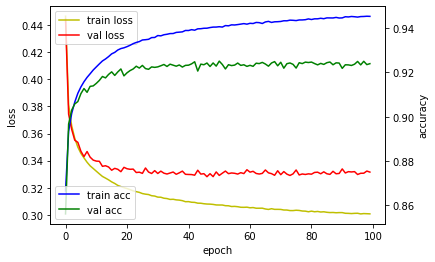

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

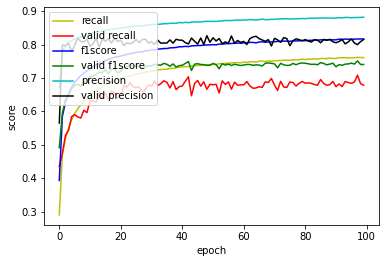

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, recall_ax = plt.subplots()


recall_ax.plot(hist.history['recall'], 'y', label='recall')
recall_ax.plot(hist.history['val_recall'], 'r', label='valid recall')

recall_ax.plot(hist.history['f1score'], 'b', label='f1score')
recall_ax.plot(hist.history['val_f1score'], 'g', label='valid f1score')

recall_ax.plot(hist.history['precision'], 'c', label='precision')
recall_ax.plot(hist.history['val_precision'], 'k', label='valid precision')

recall_ax.set_xlabel('epoch')
recall_ax.set_ylabel('score')

recall_ax.legend(loc='upper left')

plt.show()

In [72]:
  classifier.load_weights("/content/drive/My Drive/models/deeperppddbest.h5")
  testresult=classifier.predict(test_matrix)

In [73]:
print(testresult)

[[0.03143117 0.3027956  0.6493057  ... 0.08849069 0.9410814  0.04022819]
 [0.95758164 0.95011955 0.0542174  ... 0.03704548 0.8179147  0.03099227]
 [0.8601561  0.8712102  0.03410062 ... 0.05358827 0.8511646  0.05258662]
 ...
 [0.6954656  0.29768836 0.05800626 ... 0.12859678 0.04407325 0.05691367]
 [0.94336987 0.9034127  0.03111133 ... 0.06027943 0.02575806 0.03884482]
 [0.53660184 0.08158812 0.07824424 ... 0.15913945 0.04802689 0.06927386]]


In [74]:
def get_tag_results(testresult,test_label2):  
  classnum={}
  testnum={}
  resultmat=[]
  bestmat=[]
  for i in range(len(testresult)):
    eval_result=[0 for i in range(13)]
    best_result=[0 for i in range(13)]
    class_num=np.count_nonzero(test_label2[i]==1)+1
    classidx=(-testresult[i]).argsort()[:class_num]
    for k,j in enumerate(classidx):
      if (k==0):
        best_result[j]=1
      eval_result[j]=1
    resultmat.append(eval_result)
    bestmat.append(best_result)
    test_result2=copy.deepcopy(testresult)
    test_result2[np.where(test_result2>0.30)]=1
    test_result2[np.where(test_result2<=0.30)]=0
  resultmat=np.array(resultmat)
  bestmat=np.array(bestmat)
  testidx=mlb.inverse_transform(resultmat)
  classidx=mlb.inverse_transform(test_label2)
  testidx2=mlb.inverse_transform(test_result2)
  bestidx=mlb.inverse_transform(bestmat)
  for i in range(len(testidx)):  
    #print(bestidx[i],testidx2[i],testidx[i], classidx[i],i) # 값이 0.30 이상인 set, 원래 Label보다 1개 많이 보여주는 내림차순 set, 원래 label set 순서이다. 
    for classes in classidx[i]:
      if (classes not in classnum):
        classnum[classes]=1
      else:
        classnum[classes]+=1
    for classes in testidx[i]:
      if (classes not in testnum):
        testnum[classes]=1
      else:
        testnum[classes]+=1
  print(classnum, testnum)
  return bestidx, testidx2, testidx, classidx#가장 높은거, 0.30이상인 set, 원래의 Label보다 1개 많이 보여주는 내림차순, 원래 Label
best=get_tag_results(testresult,test_label2)[0]
print(best)


{'continuing_rhythm': 1174, 'leaping_twisting': 2401, 'up_leaping': 1283, 'One_rhythm': 1715, 'down_leaping': 1093, 'up_steping': 1134, 'repeating': 963, 'fast_rhythm': 959, 'down_steping': 324, 'triplet': 1193, 'no skills': 1052, 'staccato': 1239, 'steping_twisting': 366} {'continuing_rhythm': 1566, 'down_leaping': 1293, 'leaping_twisting': 2943, 'up_leaping': 1609, 'One_rhythm': 2226, 'fast_rhythm': 1389, 'no skills': 1760, 'repeating': 1462, 'up_steping': 1599, 'staccato': 2943, 'triplet': 1849, 'down_steping': 501, 'steping_twisting': 617}
[('up_leaping',), ('leaping_twisting',), ('leaping_twisting',), ('leaping_twisting',), ('leaping_twisting',), ('leaping_twisting',), ('leaping_twisting',), ('leaping_twisting',), ('up_leaping',), ('up_steping',), ('repeating',), ('repeating',), ('repeating',), ('up_steping',), ('repeating',), ('repeating',), ('repeating',), ('up_steping',), ('repeating',), ('repeating',), ('repeating',), ('up_steping',), ('repeating',), ('repeating',), ('repeatin

[('no skills',)]


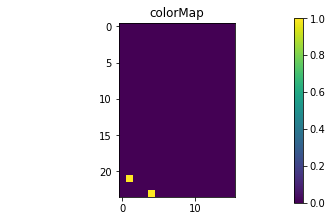

In [75]:
prediction=classifier.predict(test_matrix[460].reshape(1,24,Minimum_time,1))
categorical=np.zeros_like(prediction)
num=np.argmax(prediction)
categorical[0][num]=1
label=mlb.inverse_transform(categorical)
print(label)
H = test_matrix[460].reshape(24,Minimum_time) #위에 출력에서 나온 숫자 test_matrix['요기']에 적고 출력하면 나옴
fig = plt.figure(figsize=(6, 3.2))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(H)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

Implementation of GAN 

In [ ]:
!pip install -q imageio

In [76]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [77]:
def get_best_results(testresult,test_label2):  #for optimizing.
  classnum={}
  testnum={}
  resultmat=[]
  bestmat=[]
  for i in range(len(testresult)):
    best_result=[0 for i in range(13)]
    class_num=np.count_nonzero(test_label2[i]==1)+1
    classidx=(-testresult[i]).argsort()[:class_num]
    for k,j in enumerate(classidx):
      if (k==0):
        best_result[j]=1
    bestmat.append(best_result)
  bestmat=np.array(bestmat)
  bestidx=mlb.inverse_transform(bestmat)
  return bestidx

In [78]:
trainX=train_matrix.reshape((int(len(all_matrix)*0.85),24,Minimum_time))
for i in tqdm(range(int(len(train_matrix)//1000)),position=0):
  if(i==0):
    test_result=classifier.predict(train_matrix[1000*i:1000+1000*i])
  else:
    sub_testresult=classifier.predict(train_matrix[1000*i:1000+1000*i])
    test_result=np.concatenate((test_result,sub_testresult))
sub_testresult=classifier.predict(train_matrix[1000*(i+1):])
test_result=np.concatenate((test_result,sub_testresult))
trainy=np.array(get_best_results(test_result,train_label2)).reshape((int(len(all_matrix)*0.85),))
print('Train', trainX.shape, trainy.shape)

100%|██████████| 116/116 [00:06<00:00, 16.81it/s]


Train (116625, 24, 16) (116625,)


In [79]:
from sklearn.preprocessing import LabelEncoder
# 라벨 인코더 생성
encoder = LabelEncoder()

# X_train데이터를 이용 피팅하고 라벨숫자로 변환한다
encoder.fit(trainy)
trainy = encoder.transform(trainy)
print(trainy)
trainy=np.array(trainy)

[ 7  7  7 ...  7 12  6]


In [80]:
import numpy as np
import scipy as sp
import scipy.ndimage
def blur_image(matrix):
  sigma_y = 0.5
  sigma_x = 0.5
  inputmat=matrix
  """
  # Plot input array
  plt.imshow(inputmat, cmap='Blues', interpolation='nearest')
  plt.xlabel("$x$")
  plt.ylabel("$y$")
  plt.savefig("array.png")
  """
  # Apply gaussian filter
  sigma = [sigma_y, sigma_x]
  y = sp.ndimage.filters.gaussian_filter(inputmat, sigma, mode='constant')
  """
  # Display filtered array
  plt.imshow(y, cmap='Blues', interpolation='nearest')
  plt.xlabel("$x$")
  plt.ylabel("$y$")
  plt.title("$\sigma_x = " + str(sigma_x) + "\quad \sigma_y = " + str(sigma_y) + "$")
  plt.savefig("smooth_array_" + str(sigma_x) + "_" + str(sigma_y) + ".png")
  """
  return y


In [81]:
blur_trainX=copy.deepcopy(trainX)
for i,matrix in enumerate(trainX):
  blur_trainX[i]=blur_image(matrix)
trainX=blur_trainX

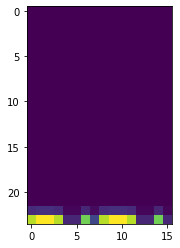

In [82]:
plt.imshow(trainX[0])

In [91]:
#These scripts refer to https://github.com/gaborvecsei/CDCGAN-Keras/tree/master/cdcgan.

import matplotlib

matplotlib.use('Agg')
from keras import models, layers

ACTIVATION = layers.Activation("tanh")


def generator_model(minimum_time):
    # Prepare noise input
    input_z = layers.Input((13,))
    dense_z_1 = layers.Dense(1024)(input_z)
    act_z_1 = ACTIVATION(dense_z_1)
    dense_z_2 = layers.Dense(128 * 6 * int(minimum_time/4))(act_z_1)
    bn_z_1 = layers.BatchNormalization()(dense_z_2)
    reshape_z = layers.Reshape((6, int(minimum_time/4), 128), input_shape=(128 * 6 * int(minimum_time/4),))(bn_z_1)

    # Prepare Conditional (label) input
    input_c = layers.Input((13,))
    dense_c_1 = layers.Dense(1024)(input_c)
    act_c_1 = ACTIVATION(dense_c_1)
    dense_c_2 = layers.Dense(128 * 6 * int(minimum_time/4))(act_c_1)
    bn_c_1 = layers.BatchNormalization()(dense_c_2)
    reshape_c = layers.Reshape((6, int(minimum_time/4), 128), input_shape=(128 * 6 * int(minimum_time/4),))(bn_c_1)

    # Combine input source
    concat_z_c = layers.Concatenate()([reshape_z, reshape_c])

    # Image generation with the concatenated inputs
    up_1 = layers.UpSampling2D(size=(2, 2))(concat_z_c)
    conv_1 = layers.Conv2D(64, (5, 5), padding='same')(up_1)
    act_1 = ACTIVATION(conv_1)
    up_2 = layers.UpSampling2D(size=(2, 2))(act_1)
    conv_2 = layers.Conv2D(1, (5, 5), padding='same')(up_2)
    act_2 = layers.Activation("tanh")(conv_2)
    model = models.Model(inputs=[input_z, input_c], outputs=act_2)
    return model


def discriminator_model(minimum_time):
    input_gen_image = layers.Input((24, minimum_time, 1))
    conv_1_image = layers.Conv2D(64, (5, 5), padding='same')(input_gen_image)
    act_1_image = ACTIVATION(conv_1_image)
    pool_1_image = layers.MaxPooling2D(pool_size=(2, 2))(act_1_image)
    conv_2_image = layers.Conv2D(128, (5, 5))(pool_1_image)
    act_2_image = ACTIVATION(conv_2_image)
    pool_2_image = layers.MaxPooling2D(pool_size=(2, 2))(act_2_image)

    input_c = layers.Input((13,))
    dense_1_c = layers.Dense(1024)(input_c)
    act_1_c = ACTIVATION(dense_1_c)
    dense_2_c = layers.Dense(4 * int(minimum_time/4-2) * 128)(act_1_c)
    bn_c = layers.BatchNormalization()(dense_2_c)
    reshaped_c = layers.Reshape((4, int(minimum_time/4-2), 128))(bn_c)

    concat = layers.Concatenate()([pool_2_image, reshaped_c])

    flat = layers.Flatten()(concat)
    dense_1 = layers.Dense(1024)(flat)
    act_1 = ACTIVATION(dense_1)
    dense_2 = layers.Dense(1)(act_1)
    act_2 = layers.Activation('sigmoid')(dense_2)
    model = models.Model(inputs=[input_gen_image, input_c], outputs=act_2)
    return model


def generator_containing_discriminator(g, d):
    input_z = layers.Input((13,))
    input_c = layers.Input((13,))
    gen_image = g([input_z, input_c])
    d.trainable = False
    is_real = d([gen_image, input_c])
    model = models.Model(inputs=[input_z, input_c], outputs=is_real)
    return model

In [89]:
import math
import os
import subprocess

import cv2
import matplotlib

matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np


def combine_images(generated_images):
    num_images = generated_images.shape[0]
    new_width = int(math.sqrt(num_images))
    new_height = int(math.ceil(float(num_images) / new_width))
    grid_shape = generated_images.shape[1:3]
    grid_image = np.zeros((new_height * grid_shape[0], new_width * grid_shape[1]), dtype=generated_images.dtype)
    for index, img in enumerate(generated_images):
        i = int(index / new_width)
        j = index % new_width
        grid_image[i * grid_shape[0]:(i + 1) * grid_shape[0], j * grid_shape[1]:(j + 1) * grid_shape[1]] = \
            img[:, :, 0]
    return grid_image


def generate_noise(shape: tuple):
    noise = np.random.uniform(0, 1, size=shape)
    return noise


def generate_condition_embedding(label: int, nb_of_label_embeddings: int):
    label_embeddings = np.zeros((nb_of_label_embeddings, 13))
    label_embeddings[:, label] = 1
    return label_embeddings


def generate_images(generator, nb_images: int, label: int):
    noise = generate_noise((nb_images, 13))
    label_batch = generate_condition_embedding(label, nb_images)
    generated_images = generator.predict([noise, label_batch], verbose=0)
    return generated_images


def generate_mnist_image_grid(generator, title: str = "Generated images"):
    generated_images = []

    for i in range(10):
        noise = generate_noise((10, 13))
        label_input = generate_condition_embedding(i, 10)
        gen_images = generator.predict([noise, label_input], verbose=0)
        generated_images.extend(gen_images)

    generated_images = np.array(generated_images)
    image_grid = combine_images(generated_images)
    image_grid = inverse_transform_images(image_grid)

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.axis("off")
    ax.imshow(image_grid, cmap="gray")
    ax.set_title(title)
    fig.canvas.draw()

    image = np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8, sep='')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    plt.close()

    return image


def save_generated_image(image, epoch, iteration, folder_path):
    if not os.path.isdir(folder_path):
        os.makedirs(folder_path)

    file_path = "{0}/{1}_{2}.png".format(folder_path, epoch, iteration)
    cv2.imwrite(file_path, image.astype(np.uint8))


def transform_images(images: np.ndarray):
    """
    [0,1]Transform images to [-1, 1]
    """
    max_value=images.max()

    images = (images.astype(np.float32) - (max_value/2)) / (max_value/2)
    return images


def inverse_transform_images(images: np.ndarray):
    """
    From the [-1, 1] range transform the images back to [0, 255]
    """

    images = images * 127.5 + 127.5
    images = images.astype(np.uint8)
    return images


def convert_video_to_gif(input_video_path, output_gif_path, fps=24):
    palette_image_path = "palette.png"
    command_palette = 'ffmpeg -y -t 0 -i {0} -vf fps={1},scale=320:-1:flags=lanczos,palettegen {2}'.format(input_video_path,
                                                                                                           fps,
                                                                                                           palette_image_path)
    command_convert = 'ffmpeg -y -t 0 -i {0} -i {1} -filter_complex "fps={2},scale=320:-1:flags=lanczos[x];[x][1:v]paletteuse" {3}'.format(input_video_path,palette_image_path, fps, output_gif_path)
    
    try:
        subprocess.check_call(command_palette)
        subprocess.check_call(command_convert)
    except subprocess.CalledProcessError as exc:
        print(exc.output)
        raise
    finally:
        os.remove(palette_image_path)

In [85]:
pip install git+https://github.com/gaborvecsei/Swiss-Army-Tensorboard.git

  Cloning https://github.com/gaborvecsei/Swiss-Army-Tensorboard.git to /tmp/pip-req-build-907do1c_
  Running command git clone -q https://github.com/gaborvecsei/Swiss-Army-Tensorboard.git /tmp/pip-req-build-907do1c_
  Created wheel for swiss-army-tensorboard: filename=swiss_army_tensorboard-0.0.1-cp36-none-any.whl size=5376 sha256=9cca0d54f94587df3e1c673cb1dd4e7513247e31de4d5126c649a72dac797a24
  Stored in directory: /tmp/pip-ephem-wheel-cache-2488_nfv/wheels/ea/f7/db/67f8661f9c334ad8eda2d0dfbc21bcaea99f739c97f6008d41
Successfully built swiss-army-tensorboard


In [92]:
import matplotlib

matplotlib.use('Agg')
import numpy as np
from keras import backend as K
from keras import utils as keras_utils
from keras import optimizers
from keras import datasets
from swiss_army_tensorboard import tfboard_loggers
from tqdm import tqdm

BATCH_SIZE = 256
EPOCHS = 75

# Load & Prepare MNIST

X_train=trainX
y_train=trainy
X_train = transform_images(X_train)
X_train = X_train[:, :, :, None]

y_train = keras_utils.to_categorical(y_train, 13)

# Create the models

G = generator_model(Minimum_time)
D = discriminator_model(Minimum_time)

GD = generator_containing_discriminator(G, D)

optimizer = optimizers.Adam(0.0002, 0.5)

G.compile(loss='binary_crossentropy', optimizer=optimizer)
GD.compile(loss='binary_crossentropy', optimizer=optimizer)
D.trainable = True
D.compile(loss='binary_crossentropy', optimizer=optimizer)


In [ ]:
G.load_weights("/content/drive/My Drive/MARG/PPDDlist/GAN_result/generator.h5")
D.load_weights("/content/drive/My Drive/MARG/PPDDlist/GAN_result/discriminator.h5")

In [93]:
from tensorflow import keras
# Setup Tensorboard loggers

tfboard_loggers.TFBoardModelGraphLogger.log_graph("/content/drive/My Drive/MARG/PPDDlist/GAN_result/logs", K.get_session())
loss_logger = tfboard_loggers.TFBoardScalarLogger("/content/drive/My Drive/MARG/PPDDlist/GAN_result/logs/loss")
image_logger = tfboard_loggers.TFBoardImageLogger("/content/drive/My Drive/MARG/PPDDlist/GAN_result/logs/generated_images")

# Model Training

iteration = 0
dist_val=0.8
nb_of_iterations_per_epoch = int(X_train.shape[0] / BATCH_SIZE)
print("Number of iterations per epoch: {0}".format(nb_of_iterations_per_epoch))

for epoch in range(EPOCHS):
    pbar = tqdm(desc="Epoch: {0}".format(epoch), total=X_train.shape[0],position=0)

    g_losses_for_epoch = []
    d_losses_for_epoch = []

    for i in range(nb_of_iterations_per_epoch):
        noise = generate_noise((BATCH_SIZE, 13))

        image_batch = X_train[i * BATCH_SIZE:(i + 1) * BATCH_SIZE]
        label_batch = y_train[i * BATCH_SIZE:(i + 1) * BATCH_SIZE]

        generated_images = G.predict([noise, label_batch], verbose=0)
        X = np.concatenate((image_batch, generated_images))
        y = [1] * BATCH_SIZE + [0] * BATCH_SIZE
        label_batches_for_discriminator = np.concatenate((label_batch, label_batch))
        
        if(np.random.random()<dist_val):
            D_loss = D.train_on_batch([X, label_batches_for_discriminator], y)
            d_losses_for_epoch.append(D_loss)
            loss_logger.log_scalar("discriminator_loss", D_loss, iteration)

        noise = generate_noise((BATCH_SIZE, 13))
        D.trainable = False
        G_loss = GD.train_on_batch([noise, label_batch], [1] * BATCH_SIZE)
        D.trainable = True
        g_losses_for_epoch.append(G_loss)
        loss_logger.log_scalar("generator_loss", G_loss, iteration)

        pbar.update(BATCH_SIZE)

        iteration += 1
        
    # Save a generated image for every epoch
    image_grid = generate_mnist_image_grid(G, title="Epoch {0}".format(epoch))
    save_generated_image(image_grid, epoch, 0, "/content/drive/My Drive/MARG/PPDDlist/GAN_result/generated_mnist_images_per_epoch")
    image_logger.log_images("/content/drive/My Drive/MARG/PPDDlist/GAN_result/generated_mnist_images_per_epoch", [image_grid], epoch)

    pbar.close()
    print("D loss: {0}, G loss: {1}".format(np.mean(d_losses_for_epoch), np.mean(g_losses_for_epoch)))
    if(np.mean(g_losses_for_epoch)>1):
      dist_val=0.8
    else:
      dist_val=0.4


    G.save_weights("/content/drive/My Drive/MARG/PPDDlist/GAN_result/generator.h5")
    D.save_weights("/content/drive/My Drive/MARG/PPDDlist/GAN_result/discriminator.h5")

/usr/local/lib/python3.6/dist-packages/swiss_army_tensorboard/tfboard_loggers/tfboard_loggers.py:19: UserWarning: Folder /content/drive/My Drive/MARG/PPDDlist/GAN_result/logs/loss is already created, maybe it contains other log files
  warnings.warn("Folder {0} is already created, maybe it contains other log files".format(log_dir))
/usr/local/lib/python3.6/dist-packages/swiss_army_tensorboard/tfboard_loggers/tfboard_loggers.py:19: UserWarning: Folder /content/drive/My Drive/MARG/PPDDlist/GAN_result/logs/generated_images is already created, maybe it contains other log files
  warnings.warn("Folder {0} is already created, maybe it contains other log files".format(log_dir))
Epoch: 0:   0%|          | 0/116625 [00:00<?, ?it/s]

Number of iterations per epoch: 455




Epoch: 0: 100%|█████████▉| 116480/116625 [00:30<00:00, 3827.86it/s]


D loss: 0.33786195516586304, G loss: 0.8356335163116455


Epoch: 1: 100%|█████████▉| 116480/116625 [00:15<00:00, 7395.67it/s]


D loss: 0.6987853050231934, G loss: 0.6996198296546936


Epoch: 2: 100%|█████████▉| 116480/116625 [00:14<00:00, 7883.88it/s]


D loss: 0.6935383677482605, G loss: 0.7070029973983765


Epoch: 3: 100%|█████████▉| 116480/116625 [00:14<00:00, 7868.28it/s]


D loss: 0.6930190324783325, G loss: 0.709044337272644


Epoch: 4: 100%|█████████▉| 116480/116625 [00:14<00:00, 7951.07it/s]


D loss: 0.6927059888839722, G loss: 0.710397481918335


Epoch: 5: 100%|█████████▉| 116480/116625 [00:15<00:00, 7746.87it/s]


D loss: 0.6927472949028015, G loss: 0.7168907523155212


Epoch: 6: 100%|█████████▉| 116480/116625 [00:34<00:00, 3331.04it/s]


D loss: 0.6913211345672607, G loss: 0.7197620868682861


Epoch: 7: 100%|█████████▉| 116480/116625 [00:14<00:00, 7807.73it/s]


D loss: 0.6901997327804565, G loss: 0.7124283909797668


Epoch: 8: 100%|█████████▉| 116480/116625 [00:15<00:00, 7472.32it/s]


D loss: 0.6920886635780334, G loss: 0.7284135222434998


Epoch: 9: 100%|█████████▉| 116480/116625 [00:14<00:00, 7820.00it/s]


D loss: 0.6890309453010559, G loss: 0.7196526527404785


Epoch: 10: 100%|█████████▉| 116480/116625 [00:14<00:00, 7870.22it/s]


D loss: 0.6922711133956909, G loss: 0.7202267646789551


Epoch: 11: 100%|█████████▉| 116480/116625 [00:14<00:00, 7864.81it/s]


D loss: 0.689507782459259, G loss: 0.7338545322418213


Epoch: 12: 100%|█████████▉| 116480/116625 [00:14<00:00, 7882.97it/s]


D loss: 0.6897875666618347, G loss: 0.7240808010101318


Epoch: 13: 100%|█████████▉| 116480/116625 [00:14<00:00, 8023.30it/s]


D loss: 0.6860296130180359, G loss: 0.7371026873588562


Epoch: 14: 100%|█████████▉| 116480/116625 [00:14<00:00, 7940.25it/s]


D loss: 0.6856645941734314, G loss: 0.7410410046577454


Epoch: 15: 100%|█████████▉| 116480/116625 [00:14<00:00, 7767.56it/s]


D loss: 0.6852564215660095, G loss: 0.7462568879127502


Epoch: 16: 100%|█████████▉| 116480/116625 [00:14<00:00, 7794.13it/s]


D loss: 0.6750893592834473, G loss: 0.7777642011642456


Epoch: 17: 100%|█████████▉| 116480/116625 [00:15<00:00, 7405.37it/s]


D loss: 0.6725698709487915, G loss: 0.7703595757484436


Epoch: 18: 100%|█████████▉| 116480/116625 [00:14<00:00, 7813.69it/s]


D loss: 0.6627002954483032, G loss: 0.797021210193634


Epoch: 19: 100%|█████████▉| 116480/116625 [00:14<00:00, 7947.71it/s]


D loss: 0.6188054084777832, G loss: 0.8102720379829407


Epoch: 20: 100%|█████████▉| 116480/116625 [00:14<00:00, 7940.41it/s]


D loss: 0.48367395997047424, G loss: 0.5754273533821106


Epoch: 21: 100%|█████████▉| 116480/116625 [00:15<00:00, 7706.42it/s]


D loss: 0.36745184659957886, G loss: 0.6401950716972351


Epoch: 22: 100%|█████████▉| 116480/116625 [00:14<00:00, 7842.93it/s]


D loss: 0.2673564553260803, G loss: 0.37718459963798523


Epoch: 23: 100%|█████████▉| 116480/116625 [00:14<00:00, 7809.72it/s]


D loss: 0.4692980647087097, G loss: 0.8085348606109619


Epoch: 24: 100%|█████████▉| 116480/116625 [00:15<00:00, 7763.51it/s]


D loss: 0.4524623155593872, G loss: 0.8407853245735168


Epoch: 25: 100%|█████████▉| 116480/116625 [00:14<00:00, 7781.54it/s]


D loss: 0.5589951276779175, G loss: 1.0612555742263794


Epoch: 26: 100%|█████████▉| 116480/116625 [00:16<00:00, 7080.46it/s]


D loss: 0.41741445660591125, G loss: 1.2179285287857056


Epoch: 27: 100%|█████████▉| 116480/116625 [00:16<00:00, 7112.44it/s]


D loss: 0.3564477562904358, G loss: 1.343332290649414


Epoch: 28: 100%|█████████▉| 116480/116625 [00:16<00:00, 7220.68it/s]


D loss: 0.37599799036979675, G loss: 1.446365475654602


Epoch: 29: 100%|█████████▉| 116480/116625 [00:16<00:00, 7185.07it/s]


D loss: 0.29645174741744995, G loss: 1.2950735092163086


Epoch: 30: 100%|█████████▉| 116480/116625 [00:16<00:00, 7016.46it/s]


D loss: 0.2947840690612793, G loss: 1.2906016111373901


Epoch: 31: 100%|█████████▉| 116480/116625 [00:16<00:00, 7117.44it/s]


D loss: 0.30328261852264404, G loss: 1.3218700885772705


Epoch: 32: 100%|█████████▉| 116480/116625 [00:16<00:00, 6946.00it/s]


D loss: 0.3373446464538574, G loss: 1.8207913637161255


Epoch: 33: 100%|█████████▉| 116480/116625 [00:16<00:00, 6913.86it/s]


D loss: 0.3124873638153076, G loss: 1.8727086782455444


Epoch: 34: 100%|█████████▉| 116480/116625 [00:16<00:00, 6986.44it/s]


D loss: 0.2253037542104721, G loss: 1.2436723709106445


Epoch: 35: 100%|█████████▉| 116480/116625 [00:16<00:00, 7072.71it/s]


D loss: 0.2873673737049103, G loss: 2.021120071411133


Epoch: 36: 100%|█████████▉| 116480/116625 [00:16<00:00, 7078.41it/s]


D loss: 0.24611039459705353, G loss: 1.696873664855957


Epoch: 37: 100%|█████████▉| 116480/116625 [00:16<00:00, 7047.66it/s]


D loss: 0.23932498693466187, G loss: 2.054548501968384


Epoch: 38: 100%|█████████▉| 116480/116625 [00:16<00:00, 7151.63it/s]


D loss: 0.24635326862335205, G loss: 2.087923526763916


Epoch: 39: 100%|█████████▉| 116480/116625 [00:16<00:00, 7161.07it/s]


D loss: 0.2297748625278473, G loss: 2.353471517562866


Epoch: 40: 100%|█████████▉| 116480/116625 [00:16<00:00, 7125.85it/s]


D loss: 0.20039008557796478, G loss: 2.3785150051116943


Epoch: 41: 100%|█████████▉| 116480/116625 [00:16<00:00, 7108.43it/s]


D loss: 0.223297581076622, G loss: 2.4327192306518555


Epoch: 42: 100%|█████████▉| 116480/116625 [00:16<00:00, 7167.46it/s]


D loss: 0.2048872411251068, G loss: 2.5778961181640625


Epoch: 43: 100%|█████████▉| 116480/116625 [00:16<00:00, 7230.98it/s]


D loss: 0.22138148546218872, G loss: 2.626657009124756


Epoch: 44: 100%|█████████▉| 116480/116625 [00:16<00:00, 7230.19it/s]


D loss: 0.23158028721809387, G loss: 2.5656328201293945


Epoch: 45: 100%|█████████▉| 116480/116625 [00:16<00:00, 7210.62it/s]


D loss: 0.18861111998558044, G loss: 2.6182961463928223


Epoch: 46: 100%|█████████▉| 116480/116625 [00:16<00:00, 7265.00it/s]


D loss: 0.19435076415538788, G loss: 2.6293697357177734


Epoch: 47: 100%|█████████▉| 116480/116625 [00:16<00:00, 7091.02it/s]


D loss: 0.1815577745437622, G loss: 2.729402542114258


Epoch: 48: 100%|█████████▉| 116480/116625 [00:15<00:00, 7377.98it/s]


D loss: 0.1829432100057602, G loss: 2.8147356510162354


Epoch: 49: 100%|█████████▉| 116480/116625 [00:16<00:00, 7156.48it/s]


D loss: 0.159099280834198, G loss: 3.1233816146850586


Epoch: 50: 100%|█████████▉| 116480/116625 [00:16<00:00, 7100.12it/s]


D loss: 0.15630458295345306, G loss: 3.2514026165008545


Epoch: 51: 100%|█████████▉| 116480/116625 [00:16<00:00, 7254.40it/s]


D loss: 0.17454685270786285, G loss: 3.0294859409332275


Epoch: 52: 100%|█████████▉| 116480/116625 [00:15<00:00, 7333.46it/s]


D loss: 0.17845994234085083, G loss: 2.9303066730499268


Epoch: 53: 100%|█████████▉| 116480/116625 [00:17<00:00, 6710.56it/s]


D loss: 0.13436147570610046, G loss: 3.044862747192383


Epoch: 54: 100%|█████████▉| 116480/116625 [00:16<00:00, 7175.87it/s]


D loss: 0.15446318686008453, G loss: 3.3283612728118896


Epoch: 55: 100%|█████████▉| 116480/116625 [00:15<00:00, 7317.56it/s]


D loss: 0.1516191065311432, G loss: 3.329251766204834


Epoch: 56: 100%|█████████▉| 116480/116625 [00:16<00:00, 7279.89it/s]


D loss: 0.14688481390476227, G loss: 3.2865936756134033


Epoch: 57: 100%|█████████▉| 116480/116625 [00:16<00:00, 7228.88it/s]


D loss: 0.14550518989562988, G loss: 3.3444528579711914


Epoch: 58: 100%|█████████▉| 116480/116625 [00:16<00:00, 7260.23it/s]


D loss: 0.15140213072299957, G loss: 3.359938383102417


Epoch: 59: 100%|█████████▉| 116480/116625 [00:16<00:00, 7255.12it/s]


D loss: 0.12410376220941544, G loss: 3.2937910556793213


Epoch: 60: 100%|█████████▉| 116480/116625 [00:16<00:00, 6968.55it/s]


D loss: 0.15469074249267578, G loss: 3.472874402999878


Epoch: 61: 100%|█████████▉| 116480/116625 [00:15<00:00, 7346.27it/s]


D loss: 0.13272906839847565, G loss: 3.311777353286743


Epoch: 62: 100%|█████████▉| 116480/116625 [00:16<00:00, 7063.72it/s]


D loss: 0.1458432376384735, G loss: 3.5121614933013916


Epoch: 63: 100%|█████████▉| 116480/116625 [00:15<00:00, 7330.08it/s]


D loss: 0.14062483608722687, G loss: 3.600318670272827


Epoch: 64: 100%|█████████▉| 116480/116625 [00:15<00:00, 7356.46it/s]


D loss: 0.12339864671230316, G loss: 3.599950075149536


Epoch: 65: 100%|█████████▉| 116480/116625 [00:16<00:00, 7200.65it/s]


D loss: 0.12874627113342285, G loss: 3.656381130218506


Epoch: 66: 100%|█████████▉| 116480/116625 [00:15<00:00, 7290.86it/s]


D loss: 0.1309313327074051, G loss: 3.630488157272339


Epoch: 67: 100%|█████████▉| 116480/116625 [00:16<00:00, 7273.15it/s]


D loss: 0.10831905156373978, G loss: 3.7171218395233154


Epoch: 68: 100%|█████████▉| 116480/116625 [00:16<00:00, 7110.53it/s]


D loss: 0.13308194279670715, G loss: 3.7251224517822266


Epoch: 69: 100%|█████████▉| 116480/116625 [00:15<00:00, 7334.54it/s]


D loss: 0.11579933762550354, G loss: 3.702418804168701


Epoch: 70: 100%|█████████▉| 116480/116625 [00:15<00:00, 7280.63it/s]


D loss: 0.13145554065704346, G loss: 3.5545992851257324


Epoch: 71: 100%|█████████▉| 116480/116625 [00:15<00:00, 7315.05it/s]


D loss: 0.11266515403985977, G loss: 3.87050724029541


Epoch: 72: 100%|█████████▉| 116480/116625 [00:16<00:00, 7248.25it/s]


D loss: 0.096013642847538, G loss: 4.072824954986572


Epoch: 73: 100%|█████████▉| 116480/116625 [00:15<00:00, 7412.58it/s]


D loss: 0.10935943573713303, G loss: 4.092305660247803


Epoch: 74: 100%|█████████▉| 116480/116625 [00:15<00:00, 7396.65it/s]


D loss: 0.10635187476873398, G loss: 4.004202842712402


['One_rhythm' 'continuing_rhythm' 'down_leaping' 'down_steping'
 'fast_rhythm' 'leaping_twisting' 'no skills' 'repeating' 'staccato'
 'steping_twisting' 'triplet' 'up_leaping' 'up_steping']


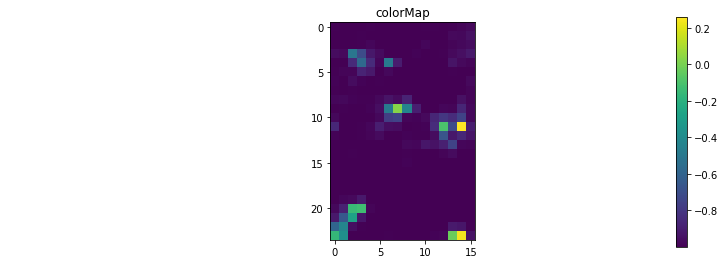

In [95]:
print(encoder.classes_)
image=generate_images(G,4,4)
H = image[0].reshape((24,Minimum_time))

fig = plt.figure(figsize=(14, 4))

ax = fig.add_subplot(111)
ax.set_title('colorMap')
plt.imshow(H)
ax.set_aspect('equal')

cax = fig.add_axes([0.12, 0.1, 0.78, 0.8])
cax.get_xaxis().set_visible(False)
cax.get_yaxis().set_visible(False)
cax.patch.set_alpha(0)
cax.set_frame_on(False)
plt.colorbar(orientation='vertical')
plt.show()

여기서부터 Simple RNN을 구현합니다.

In [96]:
RNNx_train=[]
RNNy_train=[]
RNNx_test=[]
RNNy_test=[]
RNN_kfoldx=[]
RNN_kfoldy=[]
for i in range(len(bar_matrix_list3)):
  nowseq=[]
  nowmat=np.array(bar_matrix_list3[i])
  nowbars=classifier.predict(nowmat.reshape(len(nowmat),24,Minimum_time,1) ) #이는 mlb를 통해 embedding 되어있다
  for j,bars in enumerate(nowbars):
    if(j==len(nowbars)-1):
      if(i>=5000):
        RNNy_test.append(np.argmax(bars))
      else:
        RNNy_train.append(np.argmax(bars))
      RNN_kfoldy.append(np.argmax(bars))
    else:
      nowseq.append(np.argmax(bars)+1)#0 padding을 하기 때문에 0~12에 해당하는 스킬을 1~13으로 사용한다. predict때 이를 감안하면 된다. 
  if(i>=5000):
    RNNx_test.append(nowseq)
  else:
    RNNx_train.append(nowseq)
  RNN_kfoldx.append(nowseq)

In [97]:
from keras.utils import to_categorical
print(len(RNNx_train),len(RNNx_train[0]))
print(RNNy_train)
print(to_categorical(RNNy_train))
print(mlb.inverse_transform(to_categorical(RNNy_train)))

5000 17
[6, 6, 10, 5, 3, 6, 5, 6, 6, 6, 5, 6, 12, 11, 6, 5, 6, 11, 6, 2, 6, 7, 6, 5, 3, 6, 7, 9, 11, 7, 5, 5, 6, 12, 6, 10, 6, 6, 12, 5, 6, 6, 6, 6, 6, 6, 6, 6, 12, 6, 5, 5, 6, 5, 6, 6, 12, 6, 3, 6, 6, 6, 7, 11, 12, 11, 5, 3, 6, 6, 6, 12, 11, 9, 11, 6, 2, 10, 6, 11, 6, 2, 12, 6, 6, 6, 6, 6, 5, 7, 5, 6, 11, 11, 6, 6, 8, 6, 6, 5, 0, 6, 11, 6, 6, 2, 5, 6, 11, 6, 6, 5, 11, 12, 6, 12, 4, 6, 8, 11, 2, 6, 2, 5, 7, 6, 2, 2, 11, 6, 3, 10, 5, 8, 5, 7, 6, 8, 6, 6, 11, 11, 10, 6, 5, 11, 10, 0, 8, 11, 11, 5, 5, 7, 2, 6, 6, 6, 6, 6, 6, 8, 6, 11, 6, 2, 6, 6, 6, 10, 6, 3, 6, 11, 7, 6, 2, 6, 12, 1, 6, 6, 5, 6, 11, 11, 6, 6, 12, 5, 6, 6, 5, 6, 6, 6, 3, 6, 10, 5, 6, 6, 6, 11, 12, 5, 6, 11, 11, 6, 6, 6, 3, 6, 7, 5, 7, 6, 5, 4, 6, 6, 5, 12, 9, 6, 12, 11, 6, 7, 6, 12, 6, 6, 4, 6, 11, 11, 9, 2, 5, 12, 6, 6, 7, 12, 11, 6, 6, 6, 12, 11, 6, 6, 5, 7, 6, 5, 6, 12, 6, 5, 7, 6, 5, 11, 7, 2, 6, 6, 6, 6, 6, 6, 5, 6, 6, 11, 6, 12, 5, 4, 10, 12, 6, 12, 5, 5, 6, 3, 5, 11, 5, 6, 6, 6, 12, 11, 12, 11, 7, 12, 6, 6, 4, 8, 6

In [98]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
RNNy_test=to_categorical(np.array(RNNy_test))
RNNy_train=to_categorical(np.array(RNNy_train))
RNN_kfoldy=to_categorical(np.array(RNN_kfoldy))
# fix random seed for reproducibility
numpy.random.seed(7)
top_words=13
# truncate and pad input sequences

RNNx_train = sequence.pad_sequences(RNNx_train, maxlen=10)
RNNx_test = sequence.pad_sequences(RNNx_test, maxlen=10)
RNN_kfoldx = sequence.pad_sequences(RNN_kfoldx, maxlen=10)


In [99]:
print(RNN_kfoldx.shape, RNN_kfoldy.shape)

(8214, 10) (8214, 13)


In [100]:
unique, counts = numpy.unique(RNN_kfoldx, return_counts=True)
RNN_weight=dict(zip(unique, 5000/counts))

In [101]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
model_path = '/content/drive/My Drive/models/' + 'RNN.h5'

cb_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_accuracy',
                                verbose=1, save_best_only=True)
callbacks = [cb_checkpoint]

In [102]:
from keras import regularizers
# create the model
embedding_vecor_length = 32
timesteps = 8

RNNmodel = Sequential()
RNNmodel.add(Embedding(top_words, embedding_vecor_length, input_length=10))
RNNmodel.add(LSTM(100, return_sequences=True,
               input_shape=(timesteps, 100)))  # returns a sequence of vectors of dimension 32
RNNmodel.add(LSTM(100))  # return a single vector of dimension 32
RNNmodel.add(Dropout(0.2))
RNNmodel.add(Dense(13, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))

RNNmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



아래거는 kfold방식. 더 아래에는 그냥 위에서 설정한 RNNmodel을 train : valid = 1:1로 학습하는 코드가 있다.

In [103]:
kfold = KFold(n_splits=5, shuffle=True, random_state=7)
for i in range(3):
  for train,valid in kfold.split(RNN_kfoldx,RNN_kfoldy):
    RNNmodel.fit(RNN_kfoldx[train],RNN_kfoldy[train], validation_data=(RNN_kfoldx[valid],RNN_kfoldy[valid])
    ,epochs=15, batch_size=64,callbacks=callbacks, class_weight='balanced')

Train on 6571 samples, validate on 1643 samples
Epoch 1/15
6571/6571 [==============================] - 3s 463us/step - loss: 2.2400 - accuracy: 0.4418 - val_loss: 2.0821 - val_accuracy: 0.4492

Epoch 00001: val_accuracy improved from -inf to 0.44918, saving model to /content/drive/My Drive/models/RNN.h5
Epoch 2/15
6571/6571 [==============================] - 2s 326us/step - loss: 2.0279 - accuracy: 0.4456 - val_loss: 1.9943 - val_accuracy: 0.4492

Epoch 00002: val_accuracy did not improve from 0.44918
Epoch 3/15
6571/6571 [==============================] - 2s 337us/step - loss: 1.9572 - accuracy: 0.4461 - val_loss: 1.9321 - val_accuracy: 0.4492

Epoch 00003: val_accuracy did not improve from 0.44918
Epoch 4/15
6571/6571 [==============================] - 2s 339us/step - loss: 1.9082 - accuracy: 0.4461 - val_loss: 1.8873 - val_accuracy: 0.4492

Epoch 00004: val_accuracy did not improve from 0.44918
Epoch 5/15
6571/6571 [==============================] - 2s 349us/step - loss: 1.8661 - a

In [ ]:
hist=RNNmodel.fit(RNNx_train, RNNy_train, validation_data=(RNNx_test, RNNy_test), epochs=50, batch_size=64,callbacks=callbacks)

KeyError: ignored

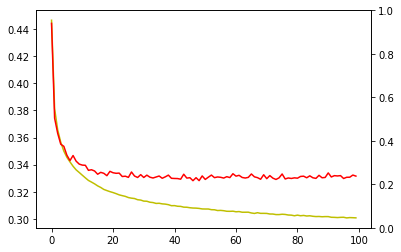

In [104]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [105]:
scores = RNNmodel.evaluate(RNNx_test, RNNy_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 89.64%


In [106]:
print(RNNmodel.predict(RNNx_test))# (size,10)의 RNNxtest를 넣으면 (size,13)이 나온다.

[[0.0017162  0.00140566 0.06486911 ... 0.00119376 0.13487878 0.00382763]
 [0.00316271 0.00064948 0.00646305 ... 0.00126299 0.00310969 0.00187415]
 [0.00045186 0.00043833 0.00181264 ... 0.00134835 0.00530833 0.00065196]
 ...
 [0.00334379 0.00059482 0.00379446 ... 0.00124553 0.00271904 0.00095367]
 [0.00062561 0.00087392 0.00299865 ... 0.0009751  0.00748408 0.00049961]
 [0.00440741 0.0062241  0.024077   ... 0.01731449 0.14819099 0.05875698]]


classifier : 24*24 bar input을 기반하여 Skill을 분류한다. 학습은 Multilabel Classifier로써 진행된다.

updown_classifier : 24*24 bar input을 기반하여 다음 bar의 pitch change를 분류한다. 학습은 up, down, final, meanless 4가지 기반하여 진행되나 분류 자체는 up, down만 유의미하다.

RNNmodel : bar skill sequence를 기반하여 다음 bar가 어떤 스킬을 가지는지를 분류한다. 학습은 k-fold기반의 RNN으로 진행된다

G : GAN기반한 모델의 Generator이다. image_generator(G,갯수,encoded skill num)과 같은 형태로 사용하여 이미지를 생성할 수 있다. 원할한 생성을 위해 Matrix Image에 Bluring을 사용한다.

이제 G가 생성한 Matrix이미지를 0과1로 이루어진 Matrix로 정리하고, Chord를 Match시켜준 뒤 MIDI로 Decoding하면 끝이다.

In [ ]:
#Model Loading Only
RNNmodel = Sequential()
RNNmodel.add(Embedding(top_words, embedding_vecor_length, input_length=10))
RNNmodel.add(LSTM(100, return_sequences=True,
               input_shape=(timesteps, 100)))  # returns a sequence of vectors of dimension 32
RNNmodel.add(LSTM(100))  # return a single vector of dimension 32
RNNmodel.add(Dropout(0.2))
RNNmodel.add(Dense(13, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)))
RNNmodel.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
RNNmodel.load_weights('/content/drive/My Drive/models/RNN.h5')

G = generator_model()
G.compile(loss='binary_crossentropy', optimizer=optimizer)
G.load_weights("/content/drive/My Drive/MARG/PPDDlist/GAN_result/generator.h5")

updown_classifier=make_classifier()
updown_classifier.compile(loss=keras.losses.CategoricalCrossentropy(
      from_logits=False, label_smoothing=0.1, 
      name='categorical_crossentropy'
  ), optimizer='adam', metrics=['accuracy'])
updown_classifier.load_weights("/content/drive/My Drive/models/updown.h5")

classifier=make_model()
classifier.compile(loss=keras.losses.BinaryCrossentropy(
      from_logits=False, label_smoothing=0.1, 
      name='binary_crossentropy'
  ), optimizer='adam', metrics=['accuracy',recall,precision,f1score])
classifier.load_weights("/content/drive/My Drive/models/deeperppddbest.h5")

KeyboardInterrupt: ignored

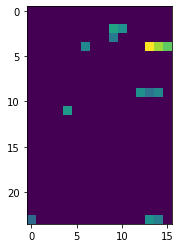

In [156]:
import cv2
H=generate_images(G,3,4)[0]

def matrix_cleaner(matrix,minimum_time):
  #matrix should be size of 24*24
  #make matrix's value of [0,1]  
  matrix=np.matrix(matrix)
  maximum_value=matrix.max()
  minimum_value=matrix.min()
  matrix=(matrix-minimum_value)/(maximum_value-minimum_value)
  flat=matrix.flatten()
  flat.sort()
  flat=flat.reshape((24*minimum_time,1))
  hundred_val=flat[-100]
  matrix_for_duration=np.where(matrix<0.1,0,matrix)
  matrix=np.where(matrix<hundred_val,0,matrix)
  matrix=np.where(matrix<1/3,0,matrix)
  
  return matrix,matrix_for_duration
plt.imshow(matrix_cleaner(H,Minimum_time)[0])

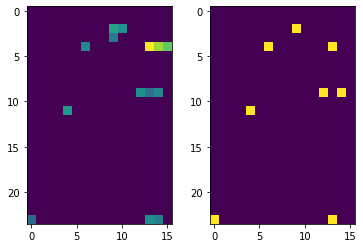

In [157]:
import numpy as np
from scipy.ndimage.filters import maximum_filter
from scipy.ndimage.morphology import generate_binary_structure, binary_erosion
import matplotlib.pyplot as pp

#getting a list of images

paws = [matrix_cleaner(H,Minimum_time)[0]]


def detect_peaks(image):
    """
    Takes an image and detect the peaks usingthe local maximum filter.
    Returns a boolean mask of the peaks (i.e. 1 when
    the pixel's value is the neighborhood maximum, 0 otherwise)
    """

    # define an 8-connected neighborhood
    neighborhood = generate_binary_structure(2,2)

    #apply the local maximum filter; all pixel of maximal value 
    #in their neighborhood are set to 1
    local_max = maximum_filter(image, footprint=neighborhood)==image
    #local_max is a mask that contains the peaks we are 
    #looking for, but also the background.
    #In order to isolate the peaks we must remove the background from the mask.

    #we create the mask of the background
    background = (image==0)

    #a little technicality: we must erode the background in order to 
    #successfully subtract it form local_max, otherwise a line will 
    #appear along the background border (artifact of the local maximum filter)
    eroded_background = binary_erosion(background, structure=neighborhood, border_value=1)

    #we obtain the final mask, containing only peaks, 
    #by removing the background from the local_max mask (xor operation)
    detected_peaks = local_max ^ eroded_background
    detected_peaks=np.where(detected_peaks==True,1,0)

    return detected_peaks


#applying the detection and plotting results
for i, paw in enumerate(paws):
    detected_peaks = detect_peaks(paw)
    pp.subplot(1,2,(2*i+1))
    pp.imshow(paw)
    pp.subplot(1,2,(2*i+2) )
    pp.imshow(detected_peaks)

pp.show()

[[23  0]
 [11  4]
 [ 4  6]
 [ 2  9]
 [ 9 12]
 [ 4 13]
 [23 13]
 [ 9 14]] [1 2 2 2 2 3 2 1] [0.3459293  0.5397763  0.46556175 0.58330435 0.50278753 1.
 0.50210226 0.46178928]


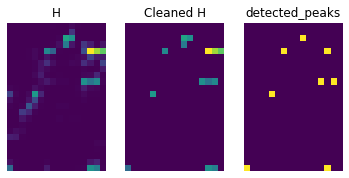

In [170]:
def left_shifting(matrix,detected_peak,minimum_time):
  #input은 detected_peak가 들어와야한다.
  dots=[]
  """
  for i in range(len(detected_peak[0])):
    for j in range(len(detected_peak)):
      if(detected_peak[j][i]==1):
        if(i%2!=0 and i%3!=0):#this code can shift Offbeats like 5/24, 7/24 to 4/24, 6/24, 
          detected_peak[j][i]=0
          detected_peak[j][i-1]=1
  """
  for i in range(len(detected_peak[0])):
    for j in range(len(detected_peak)):#for 문의 순서를 이렇게 지정해야 Handle이 가능하다.      
      pos=[]
      a=0
      if(detected_peak[j][i]==1):  
        pos=[j,i]
      if(len(pos)!=0):
        dots.append(pos)
  dots_with_length=[]
  starting_points=[]
  durations=[]
  velocities=[]
  for i,position in enumerate(dots):
    velocity=matrix[1][position[0]][position[1]]
    if(position[1]!=0):
      if(velocity<matrix[1][position[0]][position[1]-1]):
        velocity=matrix[1][position[0]][position[1]-1] #for handling shifted notes
        #Note that matrix[1][position[0]][position[1]>matrix[1][position[0]][position[1]-1] for all none-shifted notes since
        #peak notes selected by local maximum neighboorhood.
    velocities.append(velocity)
    length_val=0
    while True:
      if(length_val==0):
        starting_points.append([position[0],position[1]])
      else:
        if(position[1]+length_val>minimum_time-1):
          break
        if(detected_peak[position[0]][position[1]+length_val]!=0):
          break
      if(position[1]+length_val>minimum_time-1):
        break
      elif(matrix[1][position[0]][position[1]+length_val]!=0):
        dots_with_length.append([position[0],position[1]+length_val])
      else:
        break
      length_val+=1
    durations.append(length_val)
  result=np.zeros_like(matrix[0])
  for position in dots_with_length:
    result[position[0]][position[1]]=1
  return result,np.array(starting_points),np.array(durations),np.array(velocities)

paws = [matrix_cleaner(H,Minimum_time)[0]]
detected_peaks = detect_peaks(paws[0])
fig = plt.figure()
ax1 = fig.add_subplot(1, 3, 1)
ax1.imshow(H.reshape(24,Minimum_time))
ax1.set_title('H')
ax1.axis("off")
 
ax3 = fig.add_subplot(1, 3, 2)
ax3.imshow(paws[0].reshape(24,Minimum_time))
ax3.set_title('Cleaned H')
ax3.axis("off")

ax2 = fig.add_subplot(1, 3, 3)
ax2.imshow(detect_peaks(matrix_cleaner(H,Minimum_time)[0]))
ax2.set_title('detected_peaks')
ax2.axis("off")
#plt.imshow(left_shifting(matrix_cleaner(H),detect_peaks(matrix_cleaner(H)[0]))[0])

print(left_shifting(matrix_cleaner(H,Minimum_time),detected_peaks,Minimum_time)[1],
      left_shifting(matrix_cleaner(H,Minimum_time),detected_peaks,Minimum_time)[2],
      left_shifting(matrix_cleaner(H,Minimum_time),detected_peaks,Minimum_time)[3])

In [116]:
C_chord=[1,0,1,0,1,1,0,1,0,1,0,1]
chords=['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']
def chord_matching(shifted_matrix,chord,last_pitch,direction):
  #input은 left_shifting의 output을 그대로 넣고, chord(C,C#,D,D#....,B), 마지막 리듬의 pitch를 숫자로, 그리고 진행 방향을 direction(1,0)으로 받는다.
  #output은 MIDI기반의 decoding이 되도록 정보 기반으로, 그리고 last_pitch까지 넣어준다.
  #또한 출력 그림과 상관없이, 그냥 Note Pitch를 그냥 Matrix에 넣어준다.
  before_matrix=shifted_matrix[0]
  before_pitch=last_pitch
  if (last_pitch<40):
    direction=1
  if (last_pitch>80):
    direction=0
  if chord not in chords:
    now_chord='C'
  now_chord=chord
  chord_diff=chords.index(now_chord)
  now_chord_list=np.roll(C_chord,chord_diff)#[1,0,1,0,1...] 이런 set인데 여기에 맞추면 함수에 넣은 chord에 맞게 된다.
  #나중에 그냥 chord뿐만 아니라 화음의 종류까지 고민하게 된다면 이걸 잘 쓰면 된다.
  pitch_set=[]
  for pitchs in shifted_matrix[1]:
    pitch_set.append(23-pitchs[0])#위 그림 기준 7,17,9,7,3,5 이렇게 들감
  pitch_set=pitch_set-pitch_set[0]#이러면 0, 10, -1, 0 ,-4, -2, 이렇게 들간다. 상대적인 위치를 다루는게 쉽다.
  if (direction==1):
    possible_set=[]
    for i in range(12):
      possible_set.append(pitch_set+i+last_pitch)
  else:
    possible_set=[]
    for i in range(12):
      possible_set.append(pitch_set-i+last_pitch)
  possible_set_score=[]
  for sets in possible_set:
    score=0
    for pitchs in sets:
      score+=now_chord_list[pitchs%12]
    possible_set_score.append(score)
  final_set=possible_set[np.argmax(possible_set_score)]
  return_val=[]
  for i,sets in enumerate(final_set):
    if (before_pitch-sets<-12):
      sets=sets-12
    if (before_pitch-sets>12):
      sets=sets+12               #For prevent pitch change above 1 Octave.
    if(now_chord_list[sets%12]==1):
      final=[]
      if (shifted_matrix[2][i]!=0):
        final.append(sets)#pitch
        final.append(shifted_matrix[1][i][1])
        final.append(shifted_matrix[2][i])
        final.append(shifted_matrix[3][i])
        return_val.append(final)
    before_pitch=sets
  return return_val, sets#final pitch


In [119]:
shifted=left_shifting(matrix_cleaner(H,Minimum_time),detect_peaks(matrix_cleaner(H,Minimum_time)[0]),Minimum_time)
print(chord_matching(shifted,'C',48,1))

([[52, 10, 1, 0.40820837], [50, 6, 2, 0.51305705], [45, 12, 3, 0.90604013], [43, 0, 1, 1.0], [41, 3, 2, 0.69647956], [31, 0, 1, 0.6495035]], 31)


In [120]:
np.random.seed(7)
def generation_info(start_skill,length,chord,minimum_time):
  infos=[]
  H=generate_images(G,1,start_skill)
  shifted=left_shifting(matrix_cleaner(H,Minimum_time),detect_peaks(matrix_cleaner(H,Minimum_time)[0]),Minimum_time)
  infos.append(chord_matching(shifted,chord,48,1)[0]) # 48은 last_pitch정보, 1은 updown precition, 즉 direction 관련 정보다.
  last_pitch=chord_matching(shifted,chord,48,1)[1]

  feature_seq=[]
  feature_seq.append(start_skill+1)#RNN Predict Pad 전에 1을 더해야한다.
  feature_seq_pad=sequence.pad_sequences(np.array([feature_seq]),maxlen=10)
  prediction=RNNmodel.predict(feature_seq_pad)
  prediction[0][start_skill]=prediction[0][start_skill]/3
  prediction[0][6]=0#no skills
  updown_prediction=updown_classifier.predict(shifted[0].reshape(1,24,minimum_time,1))
  if(updown_prediction[0][0]>=updown_prediction[0][1]):
    updown_prediction=1
  else:
    updown_prediction=0
  prob=prediction/prediction.sum()
  next_skill=np.random.choice(
      np.arange(13),
      p=prob[0]
  )
  for i in range(length-1):
    #print(i+2,'th bar\'s generated skill is ',next_skill)
    H=generate_images(G,1,next_skill)
    shifted=left_shifting(matrix_cleaner(H,Minimum_time),detect_peaks(matrix_cleaner(H,Minimum_time)[0]),Minimum_time)
    infos.append(chord_matching(shifted,chord,last_pitch,updown_prediction)[0])
    feature_seq.append(next_skill+1)# H generation을 4로 했다.
    feature_seq_pad=sequence.pad_sequences(np.array([feature_seq]),maxlen=10)
    prediction=RNNmodel.predict(feature_seq_pad)
    prediction[0][next_skill]=prediction[0][next_skill]/3
    prediction[0]=prediction[0]+prediction.sum()/20 # for more variation.
    prediction[0][6]=0#6 is no skill
    updown_prediction=updown_classifier.predict(shifted[0].reshape(1,24,minimum_time,1))
    if(updown_prediction[0][0]>=updown_prediction[0][1]):
      updown_prediction=1
    else:
      updown_prediction=0
    prob=prediction/prediction.sum()
    next_skill=np.random.choice(
        np.arange(13),
        p=prob[0]
    )
  return infos

In [121]:
final_list=generation_info(0,16,'F#',Minimum_time)
"""
generation_info(final_skill, length, chord)

final_skill should be 0~12. It matches with
['One_rhythm' 'continuing_rhythm' 'down_leaping' 'down_steping'
 'fast_rhythm' 'leaping_twisting' 'no skills' 'resting' 'staccato'
 'steping_twisting' 'triplet' 'up_leaping' 'up_steping'].
 length is the bar number of song generation.
 chord should be string, 'C', 'C#', 'D' ...
 major and minor chord is not considered now.
 but maybe I can handle with making all class as two type. ex)(major One_rhythm, minor One_rhythm..)
"""

"\ngeneration_info(final_skill, length, chord)\n\nfinal_skill should be 0~12. It matches with\n['One_rhythm' 'continuing_rhythm' 'down_leaping' 'down_steping'\n 'fast_rhythm' 'leaping_twisting' 'no skills' 'resting' 'staccato'\n 'steping_twisting' 'triplet' 'up_leaping' 'up_steping'].\n length is the bar number of song generation.\n chord should be string, 'C', 'C#', 'D' ...\n major and minor chord is not considered now.\n but maybe I can handle with making all class as two type. ex)(major One_rhythm, minor One_rhythm..)\n"

In [122]:
for i in final_list:
  print(i)

[[51, 9, 2, 0.97601146], [49, 6, 2, 1.0], [47, 6, 1, 0.48840782], [42, 4, 2, 0.99571633], [30, 0, 1, 0.6545766]]
[[34, 4, 1, 0.57788944], [30, 10, 2, 0.5550961], [27, 12, 2, 1.0]]
[[34, 9, 4, 1.0], [27, 4, 1, 0.42309907]]
[[32, 6, 1, 0.37032303], [30, 14, 1, 0.5208909], [25, 4, 2, 0.57804763], [18, 14, 1, 0.35294288]]
[[32, 6, 1, 0.34464383], [27, 12, 3, 1.0], [25, 0, 1, 0.7720368], [23, 3, 2, 0.62873536], [13, 0, 1, 0.4495749]]
[[30, 4, 3, 1.0]]
[[35, 8, 1, 0.62615037], [29, 0, 1, 0.85709333]]
[[30, 4, 4, 1.0]]
[[34, 9, 2, 0.8448576], [32, 6, 2, 0.94038075], [30, 6, 2, 0.387102], [27, 14, 1, 0.81753975], [25, 4, 2, 0.91662496], [23, 3, 2, 0.44971955], [13, 0, 1, 0.5698244]]
[[34, 9, 2, 0.4623674], [32, 6, 1, 0.5622058], [27, 12, 2, 0.8754036], [25, 4, 2, 0.7734158], [23, 3, 2, 0.5758665], [13, 0, 1, 0.4581147]]
[[34, 14, 1, 0.41361913], [32, 4, 2, 0.59909964], [30, 3, 2, 0.43382517], [20, 0, 2, 0.7715293]]
[[30, 12, 2, 0.66507477], [22, 0, 1, 0.23044252]]
[[30, 4, 2, 1.0], [18, 0, 1, 

In [123]:
pip install midiutil

     |████████████████████████████████| 1.0MB 9.5MB/s 
  Created wheel for midiutil: filename=MIDIUtil-1.2.1-cp36-none-any.whl size=54571 sha256=b6f6a300e7cb9696f13762e09ab8dacbb6294f1f844a1ac213e8d086fa72d8e6
  Stored in directory: /root/.cache/pip/wheels/70/f1/24/97bde012f64820632e1e5e2935df19dfbcf9e058b0734b57cd
Successfully built midiutil


In [171]:
import midiutil
from midiutil.MidiFile import MIDIFile

for start_skill in range(12):
  for chord in chords:
    final_list=generation_info(start_skill,16,chord,Minimum_time)
    # create your MIDI object
    mf = MIDIFile(1)     # only 1 track
    track = 0   # the only track

    time = 0    # start at the beginning
    mf.addTrackName(track, time, "Sample Track")
    mf.addTempo(track, time, 120)#2초에 1bar

    # add some notes
    channel = 0
    used_time=[]
    for i,bars in enumerate(final_list):

      for notes in bars:

        pitch = notes[0]+12           # C4 (middle C) 48이 C4인 내구현에 비해 여기는 60이 C4이다.
        time = notes[1]/(Minimum_time/4)+i*4             # start on beat 0
        duration = notes[2]/(Minimum_time/4)         # 1 beat long
        volume= int(notes[3]*100)
        if (time not in used_time and duration!=0):
          mf.addNote(track, channel, pitch, time, duration, volume)
          used_time.append(time)
    with open("/content/drive/My Drive/MARG/PPDDlist/MIDI_result/output"+mlb.classes_[start_skill]+chord+".mid", 'wb') as outf:
      mf.writeFile(outf)
      print(mlb.classes_[start_skill]+chord+"  generate done!")
      print('info is \n',final_list)

One_rhythmC  generate done!
info is 
 [[[50, 2, 2, 0.8264362], [55, 4, 2, 0.5054862], [62, 7, 2, 0.9270204], [60, 12, 2, 0.64244586], [60, 14, 1, 0.82447857], [48, 14, 1, 1.0]], [[48, 0, 1, 0.37330097], [60, 4, 1, 0.5433075], [67, 6, 2, 0.5509488], [69, 9, 2, 0.5839013], [67, 13, 3, 1.0], [60, 13, 2, 0.50191516]], [[48, 1, 1, 0.68125546], [40, 2, 1, 0.7489568], [48, 5, 1, 1.0]], [[48, 0, 2, 0.9014984], [48, 2, 2, 0.86648154], [48, 4, 1, 0.826947], [48, 9, 1, 1.0]], [[48, 1, 3, 1.0], [45, 10, 2, 0.50736475], [48, 14, 1, 0.39199498]], [[48, 0, 2, 0.97663337], [48, 2, 2, 0.9139089], [48, 4, 2, 0.90725845], [48, 9, 1, 1.0]], [[48, 1, 1, 0.7206467], [45, 4, 1, 0.39203158], [48, 5, 1, 0.9114045], [52, 9, 4, 1.0], [52, 13, 1, 0.5906163]], [[52, 1, 2, 0.7083112], [57, 2, 1, 0.9323946], [45, 2, 1, 0.7569438], [53, 5, 1, 1.0], [57, 6, 1, 0.47238988], [62, 11, 3, 0.8941843]], [[48, 0, 2, 1.0], [48, 2, 2, 0.9843679], [48, 4, 1, 0.95542663]], [[52, 4, 1, 0.55868423], [59, 7, 2, 0.3744649], [52, 8, 